In [1]:
#Isa Gaillard
#Assignment 5
#Date: 5/12/2020
#Title: Project Wrap-Up: Air Pollution and Respiratory Health Relationship Analysis

For my project, I am building on data and notebooks that I have spent time using within a course I am GSI'ing in the Environmental Science and Policy Management (ESPM) Department. Within these notebooks, I have used data from the website of the Office of Environmental Health Hazard Assessment (OEHHA). The data comes from an online mapping tool called CalEnviroScreen or CES for short. I will use data from CES 1.1 (2012), CES 2.0 (2014), and CES 3.0 (2018) to assess changes over time, across geographies, and other demographic variables. CES includes environmental pollution and population data across different geographies throughout California. CES 1.1 includes data at the zip code level, while 2.0 and 3.0 provide data at the census tract level. In order to analyze the data, I will import the three different versions of CES to my Jupyter notebook as csv files within a Data folder. I will then use the different versions of CES to create a dataframe. I will also use code that was provided in the ESPM notebook in order to clean the data and run certain functions in separate "Data Cleaning" notebooks.

In [2]:
import datascience as ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plots
import scipy as sp
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm



In [3]:
pwd

'/home/jovyan/cp255/Assignment-2'

Using the cleaned data that I have stored in my Assignment-2 Data folder, I will now begin to assess the three different versions of CES, creating a unique table for each. I will do this as preparation to begin analyzing how different variables have changed over time. 

In [4]:
df = pd.read_csv(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces1_1_data.csv')
print (df)

        zip  total_pop  ces_1_1_score ces_1_1_score_percentile_range    ozone  \
0     93706      41087          66.30       96-100% (highest scores)  0.17731   
1     93307      82658          63.44       96-100% (highest scores)  0.51234   
2     95205      38069          61.60       96-100% (highest scores)  0.02279   
3     93702      48607          59.83       96-100% (highest scores)  0.31783   
4     90058       3223          59.08       96-100% (highest scores)  0.01561   
5     95203      15696          58.75       96-100% (highest scores)  0.02221   
6     95206      65004          58.40       96-100% (highest scores)  0.02532   
7     93725      24979          57.65       96-100% (highest scores)  0.20456   
8     92408      15271          57.01       96-100% (highest scores)  0.81296   
9     90220      49328          56.10       96-100% (highest scores)  0.00000   
10    90023      45903          56.04       96-100% (highest scores)  0.02100   
11    92335      95397      

In [5]:
ces1_1_data = ds.Table.read_table(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces1_1_data.csv')
ces1_1_data.take(np.arange(0,50))

zip,total_pop,ces_1_1_score,ces_1_1_score_percentile_range,ozone,ozone_percentile,pm_2.5,pm_2.5_percentile,diesel,diesel_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,age,age_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,population_characteristic_score,population_characteristic
93706,41087,66.3,96-100% (highest scores),0.17731,76.55,15.61,95.96,6.14,56.19,1120.3,90.59,1.96273e+06,86.14,388.7,37.64,195,97.58,301,93.43,4.825,84.99,0,0,12,84.91,73.4,7.3,28.43,76.46,132.4,98.95,9.1,95.94,47.6,94.22,16.9,79.82,70.6,96.91,9,90.4
93307,82658,63.44,96-100% (highest scores),0.51234,93.7,19.4,99.69,9.57,64.73,7128.7,98.37,78149,59.59,710.3,52.05,104,92.39,202,88.83,10.1,94.64,0,0,20,95.69,76.9,7.7,26.93,63.71,55.93,79.51,7.49,76.29,49.7,95.44,18.8,84.27,67.1,95.56,8.2,82.5
95205,38069,61.6,96-100% (highest scores),0.02279,38.53,12.51,71.65,18.95,80.5,94.2,72.24,4.77328e+06,90.28,1352.2,72.67,96,91.62,325,94.11,9.6,94.22,6,63.87,5,53.97,73.5,7.4,27.72,71.26,73.3,90.71,6.95,60.92,47.9,94.4,23.7,89.37,68.6,96.23,8.4,83.8
93702,48607,59.83,96-100% (highest scores),0.31783,86.99,16.08,97.06,36.85,94.91,7.92,53.79,40129,53.76,1070.1,65.38,56,82.8,73,65.47,1.275,48.13,0,0,2,28.97,66.4,6.6,27.62,70.8,93.5,95.32,8.4,91.26,55.4,97.38,22.4,87.97,73.5,97.72,9,90.1
90058,3223,59.08,96-100% (highest scores),0.01561,31.32,15.26,94.98,56.8,98.36,0,0,3.0458e+07,97.54,923.7,59.97,415,99.83,178,86.73,58.775,100,7,71.67,34,99.22,71.9,7.2,25.01,43.2,57.2,80.8,7.34,72,69.6,99.7,37.9,97.69,90.5,99.88,8.2,82.2
95203,15696,58.75,96-100% (highest scores),0.02221,37.78,12.31,70.36,17.52,78.69,12.8,58.31,5.51085e+06,90.93,1328.5,72.15,179,96.89,1154,99.39,2.975,73.71,16,95.73,14,88.1,74.7,7.5,25.48,48.46,103.9,96.86,7.93,85.26,33.9,86.43,12.4,69.11,53.9,85.62,7.9,78.6
95206,65004,58.4,96-100% (highest scores),0.02532,40.1,11.92,66.5,8.23,61.79,252.3,79.83,1.10022e+07,93.65,711.7,52.11,163,96.28,434,96.68,8.05,92.53,21,98.83,34,99.22,74.8,7.5,26,53.66,86.17,93.97,7.08,65.6,38.2,89.41,18.4,83.2,51.1,82.65,7.8,78.1
93725,24979,57.65,96-100% (highest scores),0.20456,78.71,16.02,96.75,9.6,64.84,1351.9,91.83,135622,65.8,580.9,46.01,160,95.94,312,93.77,13.1,96.97,0,0,33,98.79,74.9,7.5,27.4,68.17,69.59,89.35,6.35,40.25,43.3,91.97,16.4,78.58,62.5,93.46,7.7,77
92408,15271,57.01,96-100% (highest scores),0.81296,98.26,14.01,83.28,22.65,84.68,0.346,29.88,576964,78.5,1725.2,80.92,91,90.75,110,75.08,5.95,88.87,1,14.5,24,97.41,75.2,7.5,23.19,22.74,73.255,90.65,8.11,87.68,31.5,83.51,18.5,83.36,55.4,87.22,7.6,75.9
90220,49328,56.1,96-100% (highest scores),0,0,14.6,88.43,27.27,89.09,17.9,60.61,3.23845e+06,88.6,1106.1,66.17,44,75.37,191,87.95,19.25,98.87,6,63.87,15,90,70.7,7.1,25.44,48,91.89,94.89,8.41,91.42,38.6,89.53,11.7,66.89,53.8,85.37,7.9,79.4


In [6]:
df = pd.read_csv(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces2_data.csv')
print (df)

      census_tract  total_pop        ca_county    zip             city  \
0       6019001100       3174          Fresno   93706           Fresno   
1       6019000200       3167          Fresno   93706           Fresno   
2       6019001500       2206          Fresno   93725           Fresno   
3       6019000600       6161          Fresno   93721           Fresno   
4       6071001600       6133   San Bernardino  91761          Ontario   
5       6019000902       5252          Fresno   93706           Fresno   
6       6019000502       3606          Fresno   93701           Fresno   
7       6019000901       3151          Fresno   93706           Fresno   
8       6037206050       2146      Los Angeles  90023      Los Angeles   
9       6019007100       7904          Fresno   93662            Selma   
10      6019001000       4106          Fresno   93706           Fresno   
11      6037432801       2568      Los Angeles  91731         El Monte   
12      6019000501       2815         

In [7]:
ces2_data = ds.Table.read_table(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces2_data.csv')
ces2_data.take(np.arange(0,50))

census_tract,total_pop,ca_county,zip,city,longitude,latitude,ces_2_score,ces_2_percentile_range,ozone,ozone_percentile,pm_2.5,pm_2.5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,age,age_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,population_characteristic_score_percentile
6019001100,3174,Fresno,93706,Fresno,-119.782,36.7097,89.22,96-100% (highest scores),0.255228,80.87,14.7461,97.83,44.23,93.91,519.882,83.3,5.47014,53.9,96414.5,99.81,1217.54,66.95,85.5,98.86,55.75,85.47,0.52,74.84,0,0,5,81.49,78.6211,9.53097,99.95,26.4,67.66,130.749,99.03,0.0580253,94.73,55.2,nan,83.66,77.5009,97.78,19.3,92.05,99.6,9.36066
6019000200,3167,Fresno,93706,Fresno,-119.806,36.7355,83.47,96-100% (highest scores),0.304446,84.4,14.5547,97.47,46.91,94.8,519.882,83.3,11.6964,60.54,11826.7,95.53,1012.28,59.69,21.25,84.41,49.75,83.07,0.21,56.85,0,0,0,0,72.4086,8.77791,99.54,27.5,76.31,132.321,99.11,0.0628638,99.29,52.1,nan,74.04,86.8284,99.66,25.27,98.14,99.8,9.50896
6019001500,2206,Fresno,93725,Fresno,-119.718,36.6816,83.08,96-100% (highest scores),0.225687,78.25,14.9376,98.06,15.66,54.75,753.541,98.37,2105.76,93.82,5846.92,87.54,785.58,45.43,51,96.05,100.5,93.72,12.76,99.48,0,0,22.2,99.29,78.9994,9.5768,99.96,27.9,78.76,69.5331,87.18,0.0525352,69.29,46.4,nan,80.68,62.7461,88.32,18.3,89.6,97.74,8.67497
6019000600,6161,Fresno,93721,Fresno,-119.793,36.7431,82.95,96-100% (highest scores),0.327935,85.81,14.5064,97.33,57.64,97.57,519.882,83.3,568.113,87.65,7158.2,90.58,838.784,49.37,4.95,43.88,26,66.8,0.27,62.35,0,0,0,0,71.3804,8.65317,99.32,29,84.47,116.9,97.94,0.062997,99.34,45.9,nan,75.49,88.681,99.79,26.69,98.61,99.89,9.58659
6071001600,6133,San Bernardino,91761,Ontario,-117.618,34.0578,80.7,96-100% (highest scores),0.465401,92.5,13.8882,96.19,47.08,94.83,604.312,90.34,1.36334,42.11,8122.69,91.87,1232.87,67.41,56.2,96.58,49,82.87,1.845,91.31,5,55.5,2,58.45,80.8004,9.79513,99.99,23.9,39.98,44.9096,60.66,0.0638952,99.56,60,nan,84.03,66.5397,91.46,15.71,81.57,94.58,8.2388
6019000902,5252,Fresno,93706,Fresno,-119.804,36.7178,80.05,96-100% (highest scores),0.269893,81.91,14.6732,97.73,40.93,92.38,519.882,83.3,29.7708,68.02,32996.7,98.88,352.832,14.1,12.1,69.11,6.5,27.03,0.02,8.91,0,0,4.25,76.9,66.0301,8.00461,97.37,29.8,87.69,132.4,99.19,0.0617052,98.72,57.1,nan,92.83,81.2126,98.95,32.71,99.72,100,10
6019000502,3606,Fresno,93701,Fresno,-119.782,36.7444,78.84,96-100% (highest scores),0.335804,86.22,14.4963,97.31,59.02,97.66,519.882,83.3,1376.85,91.96,4214.25,80.71,1467.88,73.02,0,0,0,0,0.1,39.19,0,0,0,0,66.2913,8.03625,97.59,29.2,85.4,116.326,97.88,0.059459,96.75,56.6,nan,88.74,74.4305,96.49,28.8,99.24,99.99,9.81003
6019000901,3151,Fresno,93706,Fresno,-119.804,36.7105,77.86,96-100% (highest scores),0.258082,81.06,14.7188,97.78,41.04,92.54,519.882,83.3,64.1853,73.5,22802.3,98.12,415.384,17.54,14.2,74.66,18,55.59,0,0,0,0,3.5,71.76,67.8777,8.22863,98.34,31.3,91.97,132.4,99.19,0.0572989,93.17,48,nan,72.35,76.216,97.29,19.22,91.92,99.76,9.4623
6037206050,2146,Los Angeles,90023,Los Angeles,-118.224,34.0299,77.8,96-100% (highest scores),0.020888,40.66,12.6967,87.03,86.29,99.27,458.041,74.57,0,0,4981.3,84.13,4181.54,97.23,34.3,92.16,39.7,78.13,7.52,98.68,7,71.63,12.6,95.86,73.8023,8.94678,99.76,36.8,97.75,56.5714,77,0.0493251,31.26,45.4,nan,98.07,67.5301,92.32,32.16,99.67,97.86,8.69606
6019007100,7904,Fresno,93662,Selma,-119.628,36.563,76.84,96-100% (highest scores),0.2353

Below, I create four data frames corresponding to the data for all of California, the Bay Area, San Francisco, and Oakland. 

In [8]:
df = pd.read_csv(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces3_data.csv')
print (df)

      census_tract  total_pop       ca_county      zip        nearby_city  \
0     6.019001e+09       3174         Fresno   93706.0             Fresno   
1     6.071002e+09       6133  San Bernardino  91761.0            Ontario   
2     6.019000e+09       3167         Fresno   93706.0             Fresno   
3     6.077001e+09       6692     San Joaquin  95203.0           Stockton   
4     6.019002e+09       2206         Fresno   93725.0             Fresno   
5     6.037205e+09       2598     Los Angeles  90023.0        Los Angeles   
6     6.077000e+09       2396     San Joaquin  95203.0           Stockton   
7     6.019001e+09       4106         Fresno   93706.0             Fresno   
8     6.037206e+09       2146     Los Angeles  90023.0        Los Angeles   
9     6.019000e+09       6343         Fresno   93721.0             Fresno   
10    6.099002e+09       4165     Stanislaus   95354.0            Modesto   
11    6.029002e+09       9122           Kern   93307.0        Bakersfield   

In [9]:
ces3_data = ds.Table.read_table(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces3_data.csv')
ces3_data.take(np.arange(0,50))

census_tract,total_pop,ca_county,zip,nearby_city,longitude,latitude,ces_3_score,ces_3_percentile,ces_3_percentile_range,sb_535_disadvantaged_community,ozone,ozone_percentile,pm_2_5,pm_2_5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,cardiovascular_disease,cardiovascular_disease_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,housing_burden,housing_burden_percentile,population_characteristic,population_characteristic_score,population_characteristic_score_percentile
6.019e+09,3174,Fresno,93706,Fresno,-119.782,36.7097,94.09,nan,nan,Yes,0.065,98.18,15.4,97.22,48.524,95.54,681.2,80.92,2.75,47.82,18552,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26,79.4,nan,9.55,99.7
6.071e+09,6133,San Bernardino,91761,Ontario,-117.618,34.0578,90.68,nan,nan,Yes,0.062,91.1,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.24,89.05,782.26,55.66,66.2,97.68,36,85.57,1.25,88.77,5,55.01,12,92.17,81.19,10,100,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,nan,9.07,98.11
6.019e+09,3167,Fresno,93706,Fresno,-119.806,36.7355,85.97,nan,nan,Yes,0.062,91.1,15.4,97.22,47.445,95.42,681.2,80.92,3.03,48.75,12454.9,95.42,576.52,39,22,85.13,30.25,81.93,0.2,60.5,0,0,2.5,57.18,71.16,8.76,99,142.12,98.33,10.16,99.78,14.96,97.67,42.3,89.06,16.7,78.39,86.8,99.56,16.1,87.98,40.1,97.85,nan,9.81,99.99
6.077e+09,6692,San Joaquin,95203,Stockton,-121.315,37.9405,82.49,nan,nan,Yes,0.046,53.02,12.54,84.02,24.117,73.52,278.76,29.11,12.93,60.56,2387.78,69.97,1305.01,78.29,50.1,96.1,132.1,98.41,0.795,84.32,19,98.63,27,99.1,74.48,9.17,99.59,142.17,98.34,6.23,80.65,14.72,97.17,40.8,87.52,15.3,75.14,61.3,85.57,19.6,94.97,21.1,63.54,nan,8.99,97.72
6.019e+09,2206,Fresno,93725,Fresno,-119.718,36.6816,82.03,nan,nan,Yes,0.065,98.18,15.4,97.22,18.846,58.22,1000.24,98.64,3518.41,95.15,21790.7,98.15,435.16,24.3,60,97.15,54.2,92.09,13.1,99.7,0,0,50.8,99.91,80.2,9.88,99.99,90.48,89.54,4.5,38.92,12.82,92.36,45.1,91.13,14.7,73.72,66.4,90.23,18.6,93.65,28.1,83.98,nan,8.3,92.76
6.0372e+09,2598,Los Angeles,90023,Los Angeles,-118.197,34.0175,80.73,nan,nan,Yes,0.046,53.02,12.89,92.89,56.52,96.98,714.48,83.49,0,0,39040.2,99.3,2943.44,97.19,36.7,93.14,25,77.29,4.93,96.31,7,71.61,3.85,65.67,76.73,9.45,99.88,68.74,77.63,7.35,93.21,10.4,77.62,53.1,95.67,23.7,89.15,66.4,90.23,11.6,67.42,22,67.03,nan,8.54,94.89
6.077e+09,2396,San Joaquin,95203,Stockton,-121.302,37.9524,80.18,nan,nan,Yes,0.046,53.02,13.44,94,21.76,66.48,278.76,29.11,172.49,79.19,707.536,56.11,885.52,61.94,89.7,98.89,149.05,98.74,0.135,50.68,14,94.41,2.3,52.98,68.27,8.41,98.07,169.56,99.36,8.36,97.86,12.7,91.68,46,91.72,27.1,92.4,76.2,97.03,14.4,82,24.3,74.73,nan,9.53,99.65
6.019e+09,4106,Fresno,93706,Fresno,-119.804,36.6978,80.13,nan,nan,Yes,0.065,98.18,15.4,97.22,20.848,64.14,788.02,89.12,1435.93,90.89,6996.96,88.06,243.54,7.97,15.45,77.6,20,71.07,0,0,0,0,10,89.46,66.88,8.24,97.35,142.28,98.42,7.83,95.91,14.96,97.67,47.4,92.58,15.8,76.58,74.5,95.9,20,95.49,31.8,90.72,nan,9.73,99.91
6.03721e+09,2146,Los Angeles,90023,Los Angeles,-118.224,34.0299,79.03,nan,nan,Yes,0.046,53.02,12.89,92.89,53.958,96.42,664.07,78.57,0,0,10378.2,94.06,2810.82,96.63,36.05,92.96,16.25,63.8,10.025,99.13,7,71.61,22.1,98.02,77.09,9.5,99.9,58.03,66.53,6.71,87.5,7.24,40.56,50.4,94.36,35.7,97.12,75.7,96.64,28.5,99.

At this point I have added each of the three versions of CES to this notebook as separate tables. 

In [10]:
ces3_data

census_tract,total_pop,ca_county,zip,nearby_city,longitude,latitude,ces_3_score,ces_3_percentile,ces_3_percentile_range,sb_535_disadvantaged_community,ozone,ozone_percentile,pm_2_5,pm_2_5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,cardiovascular_disease,cardiovascular_disease_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,housing_burden,housing_burden_percentile,population_characteristic,population_characteristic_score,population_characteristic_score_percentile
6.019e+09,3174,Fresno,93706,Fresno,-119.782,36.7097,94.09,nan,nan,Yes,0.065,98.18,15.4,97.22,48.524,95.54,681.2,80.92,2.75,47.82,18552,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26,79.4,nan,9.55,99.7
6.071e+09,6133,San Bernardino,91761,Ontario,-117.618,34.0578,90.68,nan,nan,Yes,0.062,91.1,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.24,89.05,782.26,55.66,66.2,97.68,36,85.57,1.25,88.77,5,55.01,12,92.17,81.19,10,100,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,nan,9.07,98.11
6.019e+09,3167,Fresno,93706,Fresno,-119.806,36.7355,85.97,nan,nan,Yes,0.062,91.1,15.4,97.22,47.445,95.42,681.2,80.92,3.03,48.75,12454.9,95.42,576.52,39,22,85.13,30.25,81.93,0.2,60.5,0,0,2.5,57.18,71.16,8.76,99,142.12,98.33,10.16,99.78,14.96,97.67,42.3,89.06,16.7,78.39,86.8,99.56,16.1,87.98,40.1,97.85,nan,9.81,99.99
6.077e+09,6692,San Joaquin,95203,Stockton,-121.315,37.9405,82.49,nan,nan,Yes,0.046,53.02,12.54,84.02,24.117,73.52,278.76,29.11,12.93,60.56,2387.78,69.97,1305.01,78.29,50.1,96.1,132.1,98.41,0.795,84.32,19,98.63,27,99.1,74.48,9.17,99.59,142.17,98.34,6.23,80.65,14.72,97.17,40.8,87.52,15.3,75.14,61.3,85.57,19.6,94.97,21.1,63.54,nan,8.99,97.72
6.019e+09,2206,Fresno,93725,Fresno,-119.718,36.6816,82.03,nan,nan,Yes,0.065,98.18,15.4,97.22,18.846,58.22,1000.24,98.64,3518.41,95.15,21790.7,98.15,435.16,24.3,60,97.15,54.2,92.09,13.1,99.7,0,0,50.8,99.91,80.2,9.88,99.99,90.48,89.54,4.5,38.92,12.82,92.36,45.1,91.13,14.7,73.72,66.4,90.23,18.6,93.65,28.1,83.98,nan,8.3,92.76
6.0372e+09,2598,Los Angeles,90023,Los Angeles,-118.197,34.0175,80.73,nan,nan,Yes,0.046,53.02,12.89,92.89,56.52,96.98,714.48,83.49,0,0,39040.2,99.3,2943.44,97.19,36.7,93.14,25,77.29,4.93,96.31,7,71.61,3.85,65.67,76.73,9.45,99.88,68.74,77.63,7.35,93.21,10.4,77.62,53.1,95.67,23.7,89.15,66.4,90.23,11.6,67.42,22,67.03,nan,8.54,94.89
6.077e+09,2396,San Joaquin,95203,Stockton,-121.302,37.9524,80.18,nan,nan,Yes,0.046,53.02,13.44,94,21.76,66.48,278.76,29.11,172.49,79.19,707.536,56.11,885.52,61.94,89.7,98.89,149.05,98.74,0.135,50.68,14,94.41,2.3,52.98,68.27,8.41,98.07,169.56,99.36,8.36,97.86,12.7,91.68,46,91.72,27.1,92.4,76.2,97.03,14.4,82,24.3,74.73,nan,9.53,99.65
6.019e+09,4106,Fresno,93706,Fresno,-119.804,36.6978,80.13,nan,nan,Yes,0.065,98.18,15.4,97.22,20.848,64.14,788.02,89.12,1435.93,90.89,6996.96,88.06,243.54,7.97,15.45,77.6,20,71.07,0,0,0,0,10,89.46,66.88,8.24,97.35,142.28,98.42,7.83,95.91,14.96,97.67,47.4,92.58,15.8,76.58,74.5,95.9,20,95.49,31.8,90.72,nan,9.73,99.91
6.03721e+09,2146,Los Angeles,90023,Los Angeles,-118.224,34.0299,79.03,nan,nan,Yes,0.046,53.02,12.89,92.89,53.958,96.42,664.07,78.57,0,0,10378.2,94.06,2810.82,96.63,36.05,92.96,16.25,63.8,10.025,99.13,7,71.61,22.1,98.02,77.09,9.5,99.9,58.03,66.53,6.71,87.5,7.24,40.56,50.4,94.36,35.7,97.12,75.7,96.64,28.5,99.

In [11]:
type(ces3_data)

datascience.tables.Table

In [12]:
df_1 = pd.read_csv(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_bay_counties_data.csv')
print (df_1)

      census_tract  total_pop      ca_county    zip    nearby_city  \
0       6001409000       3552       Alameda   94621        Oakland   
1       6001409100       2255       Alameda   94603        Oakland   
2       6001408800       5547       Alameda   94621        Oakland   
3       6013379000       6117   Contra Costa  94804       Richmond   
4       6013312000       2292   Contra Costa  94565      Pittsburg   
5       6001409200       3152       Alameda   94603        Oakland   
6       6013365002       5462   Contra Costa  94801       Richmond   
7       6085503105       2484    Santa Clara  95122       San Jose   
8       6013377000       6962   Contra Costa  94801       Richmond   
9       6001407300       2598       Alameda   94601        Oakland   
10      6075023103       3725  San Francisco  94124  San Francisco   
11      6001409500       3122       Alameda   94621        Oakland   
12      6085512602       2997    Santa Clara  95020         Gilroy   
13      6075023200  

In [13]:
bay_counties = ds.Table.read_table(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_bay_counties_data.csv')
bay_counties.take(np.arange(0,50))

census_tract,total_pop,ca_county,zip,nearby_city,longitude,latitude,ces_3_score,ces_3_percentile,ces_3_percentile_range,sb_535_disadvantaged_community,ozone,ozone_percentile,pm_2_5,pm_2_5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,cardiovascular_disease,cardiovascular_disease_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,housing_burden,housing_burden_percentile,population_characteristic,population_characteristic_score,population_characteristic_score_percentile
6001409000,3552,Alameda,94621,Oakland,-122.221,37.72,61.5604,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,38.28,91.8979,70.5996,4.46551,0,0,596.168,53.5794,1419.88,81.2007,63.15,97.4462,118.5,97.8815,2.7,93.9388,15,95.6445,11.45,91.3935,57.4131,7.07174,87.5669,147.84,98.5413,6.15,79.1106,11.34,85.1141,28.3,74.5773,18.3,81.4291,52.5,76.2162,13.3,77.3956,32.5,91.838,nan,8.70513,96.2795
6001409100,2255,Alameda,94603,Oakland,-122.183,37.7323,59.8681,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,37.55,91.5246,70.5996,4.46551,0,0,611.929,53.8538,2145.76,92.2672,45.7,95.3849,25.1,77.375,0.335,70.7692,11,89.5423,6,78.5192,54.1433,6.669,82.066,189.95,99.7133,8.03,96.6423,14.44,96.8832,40,86.7903,7.7,49.7,55.8,79.9246,12.6,73.588,29.5,86.8875,nan,8.97707,97.6668
6001408800,5547,Alameda,94621,Oakland,-122.197,37.7588,59.6472,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,38.3151,91.9228,70.5996,4.46551,0,0,548.092,52.2824,411.44,22.2459,46.05,95.4579,37.65,86.5111,0.81,84.5598,15,95.6445,14,94.3881,50.361,6.20311,73.6403,161.73,99.065,8.75,98.6544,11.56,86.2735,46.8,92.2281,18.1,81.0292,66.5,90.3331,20.1,95.5832,35.2,94.7068,nan,9.6157,99.7856
6013379000,6117,Contra Costa,94804,Richmond,-122.357,37.9283,57.0443,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,47.223,95.2707,70.5996,4.46551,0,0,1337.78,63.108,424.6,23.3112,78.1,98.486,67,94.4224,2.195,92.4745,10,85.7838,10,89.46,52.0833,6.41525,77.3491,160.81,99.0276,7.74,95.4761,10.73,80.9874,35.1,82.1221,13.2,69.964,50.9,74.2175,16.4,88.6788,27.7,83.2826,nan,8.89198,97.2506
6013312000,2292,Contra Costa,94565,Pittsburg,-121.87,38.0152,56.8766,nan,nan,Yes,0.0377848,22.3398,7.85958,17.8144,19.7825,61.0454,136.892,8.83123,0,0,1099.02,61.1624,1192.72,75.0846,26.5,88.5808,38.3,86.8256,4.575,96.1075,12,91.4658,7.45,83.6831,53.2325,6.55681,80.2116,150.18,98.8281,6.09,78.0597,14.45,97.0328,29,75.4731,12.6,68.0709,61,85.2546,16.4,88.6788,20.8,62.427,nan,8.67443,96.0146
6001409200,3152,Alameda,94603,Oakland,-122.178,37.7291,55.292,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,31.079,86.7082,70.5996,4.46551,0,0,665.694,55.101,4291.67,99.7243,57.6,96.826,28,80.0232,0.545,78.3133,11,89.5423,5,73.544,54.9575,6.76928,83.6217,106.59,93.9035,8.38,97.9111,8.79,60.7281,30.5,77.0376,11.1,62.8983,44.4,66.2225,13.4,77.8779,27.4,82.6733,nan,8.16808,91.3861
6013365002,5462,Contra Costa,94801,Richmond,-122.384,37.9595,53.9989,nan,nan,Yes,0.0295923,7.57934,7.85958,17.8144,29.3822,84.3311,70.5996,4.46551,0.224162,26.9044,952.454,59.7032,302.07,12.2822,110.4,99.3798,45.25,89.5895,14.6,99.8332,12,91.4658,18.2,96.7696,52.0959,6.41681,77.3864,195.32,99.813,5.19,57.606,10.48,78.2197,32.2,79.0184,18.2,81.2292,60.1,84.5003,16,87.6888,29.2,86.2782,nan,8.41524,93.8706
6085503105,2484,Santa Clara,95122,San Jose,-121.859,37.3263,53.7785,nan,nan,Yes,0.0377848,22.3398,10.37,52.6073,34.5651,89.4835,479.228,51.0166,0,0,194.927,35.333,1775.83,88.0311,20.95,84.1299,24.6,76.4978,5.

In [14]:
bay_counties

census_tract,total_pop,ca_county,zip,nearby_city,longitude,latitude,ces_3_score,ces_3_percentile,ces_3_percentile_range,sb_535_disadvantaged_community,ozone,ozone_percentile,pm_2_5,pm_2_5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,cardiovascular_disease,cardiovascular_disease_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,housing_burden,housing_burden_percentile,population_characteristic,population_characteristic_score,population_characteristic_score_percentile
6001409000,3552,Alameda,94621,Oakland,-122.221,37.72,61.5604,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,38.28,91.8979,70.5996,4.46551,0,0,596.168,53.5794,1419.88,81.2007,63.15,97.4462,118.5,97.8815,2.7,93.9388,15,95.6445,11.45,91.3935,57.4131,7.07174,87.5669,147.84,98.5413,6.15,79.1106,11.34,85.1141,28.3,74.5773,18.3,81.4291,52.5,76.2162,13.3,77.3956,32.5,91.838,nan,8.70513,96.2795
6001409100,2255,Alameda,94603,Oakland,-122.183,37.7323,59.8681,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,37.55,91.5246,70.5996,4.46551,0,0,611.929,53.8538,2145.76,92.2672,45.7,95.3849,25.1,77.375,0.335,70.7692,11,89.5423,6,78.5192,54.1433,6.669,82.066,189.95,99.7133,8.03,96.6423,14.44,96.8832,40,86.7903,7.7,49.7,55.8,79.9246,12.6,73.588,29.5,86.8875,nan,8.97707,97.6668
6001408800,5547,Alameda,94621,Oakland,-122.197,37.7588,59.6472,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,38.3151,91.9228,70.5996,4.46551,0,0,548.092,52.2824,411.44,22.2459,46.05,95.4579,37.65,86.5111,0.81,84.5598,15,95.6445,14,94.3881,50.361,6.20311,73.6403,161.73,99.065,8.75,98.6544,11.56,86.2735,46.8,92.2281,18.1,81.0292,66.5,90.3331,20.1,95.5832,35.2,94.7068,nan,9.6157,99.7856
6013379000,6117,Contra Costa,94804,Richmond,-122.357,37.9283,57.0443,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,47.223,95.2707,70.5996,4.46551,0,0,1337.78,63.108,424.6,23.3112,78.1,98.486,67,94.4224,2.195,92.4745,10,85.7838,10,89.46,52.0833,6.41525,77.3491,160.81,99.0276,7.74,95.4761,10.73,80.9874,35.1,82.1221,13.2,69.964,50.9,74.2175,16.4,88.6788,27.7,83.2826,nan,8.89198,97.2506
6013312000,2292,Contra Costa,94565,Pittsburg,-121.87,38.0152,56.8766,nan,nan,Yes,0.0377848,22.3398,7.85958,17.8144,19.7825,61.0454,136.892,8.83123,0,0,1099.02,61.1624,1192.72,75.0846,26.5,88.5808,38.3,86.8256,4.575,96.1075,12,91.4658,7.45,83.6831,53.2325,6.55681,80.2116,150.18,98.8281,6.09,78.0597,14.45,97.0328,29,75.4731,12.6,68.0709,61,85.2546,16.4,88.6788,20.8,62.427,nan,8.67443,96.0146
6001409200,3152,Alameda,94603,Oakland,-122.178,37.7291,55.292,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,31.079,86.7082,70.5996,4.46551,0,0,665.694,55.101,4291.67,99.7243,57.6,96.826,28,80.0232,0.545,78.3133,11,89.5423,5,73.544,54.9575,6.76928,83.6217,106.59,93.9035,8.38,97.9111,8.79,60.7281,30.5,77.0376,11.1,62.8983,44.4,66.2225,13.4,77.8779,27.4,82.6733,nan,8.16808,91.3861
6013365002,5462,Contra Costa,94801,Richmond,-122.384,37.9595,53.9989,nan,nan,Yes,0.0295923,7.57934,7.85958,17.8144,29.3822,84.3311,70.5996,4.46551,0.224162,26.9044,952.454,59.7032,302.07,12.2822,110.4,99.3798,45.25,89.5895,14.6,99.8332,12,91.4658,18.2,96.7696,52.0959,6.41681,77.3864,195.32,99.813,5.19,57.606,10.48,78.2197,32.2,79.0184,18.2,81.2292,60.1,84.5003,16,87.6888,29.2,86.2782,nan,8.41524,93.8706
6085503105,2484,Santa Clara,95122,San Jose,-121.859,37.3263,53.7785,nan,nan,Yes,0.0377848,22.3398,10.37,52.6073,34.5651,89.4835,479.228,51.0166,0,0,194.927,35.333,1775.83,88.0311,20.95,84.1299,24.6,76.4978,5.

In [15]:
df_2 = pd.read_csv(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_san_francisco_data.csv')
print (df_2)

     census_tract  total_pop      ca_county    zip    nearby_city   longitude  \
0      6075023103       3725  San Francisco  94124  San Francisco -122.375965   
1      6075023200       4582  San Francisco  94124  San Francisco -122.386139   
2      6075017902       2880  San Francisco  94130  San Francisco -122.419701   
3      6075023400       3660  San Francisco  94124  San Francisco -122.390088   
4      6075023102       3478  San Francisco  94124  San Francisco -122.384498   
5      6075061200       4089  San Francisco  94124  San Francisco -122.390178   
6      6075012502       3821  San Francisco  94102  San Francisco -122.412595   
7      6075017601       7630  San Francisco  94103  San Francisco -122.410724   
8      6075023300       2624  San Francisco  94124  San Francisco -122.397769   
9      6075023001       5216  San Francisco  94124  San Francisco -122.401760   
10     6075012501       5335  San Francisco  94102  San Francisco -122.410977   
11     6075026403       4140

In [16]:
san_francisco = ds.Table.read_table(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_san_francisco_data.csv')
san_francisco.take(np.arange(0,50))

census_tract,total_pop,ca_county,zip,nearby_city,longitude,latitude,ces_3_score,ces_3_percentile,ces_3_percentile_range,sb_535_disadvantaged_community,ozone,ozone_percentile,pm_2_5,pm_2_5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,cardiovascular_disease,cardiovascular_disease_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,housing_burden,housing_burden_percentile,population_characteristic,population_characteristic_score,population_characteristic_score_percentile
6075023103,3725,San Francisco,94124,San Francisco,-122.376,37.7356,51.5833,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,92.89,99.2284,171.201,12.935,0,0,217.431,37.7401,270.12,9.85086,46.45,95.5126,142.5,98.6428,4.135,95.7739,14,94.4064,8.1,85.6402,50.1922,6.18232,73.2296,135.72,97.9678,7.54,94.438,9.53,69.2557,23.5,67.8653,8.5,53.2729,84.6,99.2583,17.7,91.9533,19.3,56.0929,nan,8.34367,93.1517
6075023200,4582,San Francisco,94124,San Francisco,-122.386,37.7278,50.3552,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,92.89,99.2284,171.201,12.935,0,0,207.568,36.8047,380.39,19.0625,37.45,93.4695,110.05,97.567,0.95,85.8573,10,85.7838,16.85,95.9444,50.2235,6.18618,73.3167,135.72,97.9678,8.9,98.8466,9.53,69.2557,30.4,76.9619,4.7,34.5287,37.2,55.5374,14.8,83.7035,31.8,90.721,nan,8.13996,91.0455
6075017902,2880,San Francisco,94130,San Francisco,-122.42,37.8619,49.0874,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,99.4109,99.2657,271.474,27.9656,0,0,345.66,44.45,3160.99,97.7942,159,99.8176,150,98.7752,0.2,60.5005,10,85.7838,2,50.4362,55.6643,6.85634,84.7542,95.9,91.5223,5.97,75.8554,8.44,56.5017,10.7,41.6099,3.2,24.1701,70.4,93.237,13.3,77.3956,26.6,80.8073,nan,7.15941,78.4967
6075023400,3660,San Francisco,94124,San Francisco,-122.39,37.7216,48.2452,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,65.5555,98.0709,171.201,12.935,0,0,203.143,36.206,552.72,36.6587,22.75,85.6439,21.75,73.1546,0.025,15.6812,11,89.5423,13.8,93.7986,45.012,5.54426,58.6932,135.72,97.9678,8.02,96.6167,9.53,69.2557,36.5,83.5857,17.4,79.736,56.4,80.5908,14.9,84.097,23.2,71.3379,nan,8.70183,96.2543
6075023102,3478,San Francisco,94124,San Francisco,-122.384,37.7345,47.1461,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,92.89,99.2284,171.201,12.935,0,0,212.477,37.2662,294.99,11.7935,19.5,83.0171,24.5,76.4151,3.325,94.8656,14,94.4064,5.65,75.8783,47.3058,5.8268,64.804,135.72,97.9678,8.75,98.6544,9.53,69.2557,17.1,56.5859,5.2,37.8483,62.6,86.7882,18.5,93.4256,20.8,62.427,nan,8.09124,90.6419
6075061200,4089,San Francisco,94124,San Francisco,-122.39,37.737,44.1933,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,92.89,99.2284,171.201,12.935,0,0,212.08,37.2412,388.72,19.99,5.65,46.224,2.9,16.286,2.1,92.1594,14,94.4064,6,78.5192,41.6182,5.12624,49.608,135.72,97.9678,6.67,87.0306,9.53,69.2557,37.9,84.9357,22.1,87.2284,45.5,67.6556,15.3,85.5312,27.2,82.1782,nan,8.62099,95.6489
6075012502,3821,San Francisco,94102,San Francisco,-122.413,37.7839,41.9999,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,106.3,99.4897,171.201,12.935,0,0,232.579,39.2741,572.51,38.6765,16.3,79.004,2.3,14.2006,1.41,89.6756,10,85.7838,0,0,39.6877,4.88845,44.107,122.23,96.7959,7.59,94.7328,8.05,51.253,42.8,89.402,42.8,98.8002,75.1,96.2665,14.1,80.7082,19.9,58.6443,nan,8.59165,95.4471
6075017601,7630,San Francisco,94103,San Francisco,-122.411,37.7794,41.9335,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,103.215,99.303,171.201,12.935,0,0,231.205,39.1868,845.21,59

In [17]:
san_francisco

census_tract,total_pop,ca_county,zip,nearby_city,longitude,latitude,ces_3_score,ces_3_percentile,ces_3_percentile_range,sb_535_disadvantaged_community,ozone,ozone_percentile,pm_2_5,pm_2_5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,cardiovascular_disease,cardiovascular_disease_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,housing_burden,housing_burden_percentile,population_characteristic,population_characteristic_score,population_characteristic_score_percentile
6075023103,3725,San Francisco,94124,San Francisco,-122.376,37.7356,51.5833,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,92.89,99.2284,171.201,12.935,0,0,217.431,37.7401,270.12,9.85086,46.45,95.5126,142.5,98.6428,4.135,95.7739,14,94.4064,8.1,85.6402,50.1922,6.18232,73.2296,135.72,97.9678,7.54,94.438,9.53,69.2557,23.5,67.8653,8.5,53.2729,84.6,99.2583,17.7,91.9533,19.3,56.0929,nan,8.34367,93.1517
6075023200,4582,San Francisco,94124,San Francisco,-122.386,37.7278,50.3552,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,92.89,99.2284,171.201,12.935,0,0,207.568,36.8047,380.39,19.0625,37.45,93.4695,110.05,97.567,0.95,85.8573,10,85.7838,16.85,95.9444,50.2235,6.18618,73.3167,135.72,97.9678,8.9,98.8466,9.53,69.2557,30.4,76.9619,4.7,34.5287,37.2,55.5374,14.8,83.7035,31.8,90.721,nan,8.13996,91.0455
6075017902,2880,San Francisco,94130,San Francisco,-122.42,37.8619,49.0874,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,99.4109,99.2657,271.474,27.9656,0,0,345.66,44.45,3160.99,97.7942,159,99.8176,150,98.7752,0.2,60.5005,10,85.7838,2,50.4362,55.6643,6.85634,84.7542,95.9,91.5223,5.97,75.8554,8.44,56.5017,10.7,41.6099,3.2,24.1701,70.4,93.237,13.3,77.3956,26.6,80.8073,nan,7.15941,78.4967
6075023400,3660,San Francisco,94124,San Francisco,-122.39,37.7216,48.2452,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,65.5555,98.0709,171.201,12.935,0,0,203.143,36.206,552.72,36.6587,22.75,85.6439,21.75,73.1546,0.025,15.6812,11,89.5423,13.8,93.7986,45.012,5.54426,58.6932,135.72,97.9678,8.02,96.6167,9.53,69.2557,36.5,83.5857,17.4,79.736,56.4,80.5908,14.9,84.097,23.2,71.3379,nan,8.70183,96.2543
6075023102,3478,San Francisco,94124,San Francisco,-122.384,37.7345,47.1461,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,92.89,99.2284,171.201,12.935,0,0,212.477,37.2662,294.99,11.7935,19.5,83.0171,24.5,76.4151,3.325,94.8656,14,94.4064,5.65,75.8783,47.3058,5.8268,64.804,135.72,97.9678,8.75,98.6544,9.53,69.2557,17.1,56.5859,5.2,37.8483,62.6,86.7882,18.5,93.4256,20.8,62.427,nan,8.09124,90.6419
6075061200,4089,San Francisco,94124,San Francisco,-122.39,37.737,44.1933,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,92.89,99.2284,171.201,12.935,0,0,212.08,37.2412,388.72,19.99,5.65,46.224,2.9,16.286,2.1,92.1594,14,94.4064,6,78.5192,41.6182,5.12624,49.608,135.72,97.9678,6.67,87.0306,9.53,69.2557,37.9,84.9357,22.1,87.2284,45.5,67.6556,15.3,85.5312,27.2,82.1782,nan,8.62099,95.6489
6075012502,3821,San Francisco,94102,San Francisco,-122.413,37.7839,41.9999,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,106.3,99.4897,171.201,12.935,0,0,232.579,39.2741,572.51,38.6765,16.3,79.004,2.3,14.2006,1.41,89.6756,10,85.7838,0,0,39.6877,4.88845,44.107,122.23,96.7959,7.59,94.7328,8.05,51.253,42.8,89.402,42.8,98.8002,75.1,96.2665,14.1,80.7082,19.9,58.6443,nan,8.59165,95.4471
6075017601,7630,San Francisco,94103,San Francisco,-122.411,37.7794,41.9335,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,103.215,99.303,171.201,12.935,0,0,231.205,39.1868,845.21,59

In [18]:
df_3 = pd.read_csv(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_oakland_data.csv')
print (df_3)

     census_tract  total_pop ca_county    zip nearby_city   longitude  \
0      6001409000       3552  Alameda   94621     Oakland -122.221368   
1      6001409100       2255  Alameda   94603     Oakland -122.183500   
2      6001408800       5547  Alameda   94621     Oakland -122.196942   
3      6001409200       3152  Alameda   94603     Oakland -122.177787   
4      6001407300       2598  Alameda   94601     Oakland -122.210924   
5      6001409500       3122  Alameda   94621     Oakland -122.183766   
6      6001406000       3450  Alameda   94606     Oakland -122.246184   
7      6001402200       2385  Alameda   94607     Oakland -122.296308   
8      6001409400       4306  Alameda   94603     Oakland -122.180362   
9      6001408900       3414  Alameda   94621     Oakland -122.188780   
10     6001401800       1703  Alameda   94607     Oakland -122.298236   
11     6001406100       4381  Alameda   94601     Oakland -122.227594   
12     6001403000       2788  Alameda   94607     O

In [19]:
oakland = ds.Table.read_table(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_oakland_data.csv')
oakland.take(np.arange(0,50))

census_tract,total_pop,ca_county,zip,nearby_city,longitude,latitude,ces_3_score,ces_3_percentile,ces_3_percentile_range,sb_535_disadvantaged_community,ozone,ozone_percentile,pm_2_5,pm_2_5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,cardiovascular_disease,cardiovascular_disease_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,housing_burden,housing_burden_percentile,population_characteristic,population_characteristic_score,population_characteristic_score_percentile
6001409000,3552,Alameda,94621,Oakland,-122.221,37.72,61.5604,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,38.28,91.8979,70.5996,4.46551,0,0,596.168,53.5794,1419.88,81.2007,63.15,97.4462,118.5,97.8815,2.7,93.9388,15,95.6445,11.45,91.3935,57.4131,7.07174,87.5669,147.84,98.5413,6.15,79.1106,11.34,85.1141,28.3,74.5773,18.3,81.4291,52.5,76.2162,13.3,77.3956,32.5,91.838,nan,8.70513,96.2795
6001409100,2255,Alameda,94603,Oakland,-122.183,37.7323,59.8681,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,37.55,91.5246,70.5996,4.46551,0,0,611.929,53.8538,2145.76,92.2672,45.7,95.3849,25.1,77.375,0.335,70.7692,11,89.5423,6,78.5192,54.1433,6.669,82.066,189.95,99.7133,8.03,96.6423,14.44,96.8832,40,86.7903,7.7,49.7,55.8,79.9246,12.6,73.588,29.5,86.8875,nan,8.97707,97.6668
6001408800,5547,Alameda,94621,Oakland,-122.197,37.7588,59.6472,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,38.3151,91.9228,70.5996,4.46551,0,0,548.092,52.2824,411.44,22.2459,46.05,95.4579,37.65,86.5111,0.81,84.5598,15,95.6445,14,94.3881,50.361,6.20311,73.6403,161.73,99.065,8.75,98.6544,11.56,86.2735,46.8,92.2281,18.1,81.0292,66.5,90.3331,20.1,95.5832,35.2,94.7068,nan,9.6157,99.7856
6001409200,3152,Alameda,94603,Oakland,-122.178,37.7291,55.292,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,31.079,86.7082,70.5996,4.46551,0,0,665.694,55.101,4291.67,99.7243,57.6,96.826,28,80.0232,0.545,78.3133,11,89.5423,5,73.544,54.9575,6.76928,83.6217,106.59,93.9035,8.38,97.9111,8.79,60.7281,30.5,77.0376,11.1,62.8983,44.4,66.2225,13.4,77.8779,27.4,82.6733,nan,8.16808,91.3861
6001407300,2598,Alameda,94601,Oakland,-122.211,37.7622,52.5392,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,38.3542,91.9353,70.5996,4.46551,0,0,364.463,45.4228,1406.6,80.8372,79.45,98.5954,183.05,99.189,0.86,85.1529,16,97.2585,30.5,99.4813,56.83,6.99992,86.621,99.49,92.6942,5.92,74.7917,7.73,47.2011,38.1,85.188,19,82.6023,56.3,80.5028,9.6,52.824,21.4,64.8134,nan,7.50569,83.2135
6001409500,3122,Alameda,94621,Oakland,-122.184,37.7504,51.442,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,35.085,89.7324,70.5996,4.46551,0,0,532.088,51.7585,346.51,16.0672,25.85,88.1065,40.85,88.1,3.56,95.1622,1,15.2554,12.5,92.7376,44.3674,5.46486,57.0131,161.73,99.065,7.93,96.3219,11.56,86.2735,42.9,89.4651,21.2,86.1485,64.2,88.4098,17.3,91.1029,27.6,83.1175,nan,9.41322,99.4199
6001406000,3450,Alameda,94606,Oakland,-122.246,37.7876,50.2843,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,44.5804,94.9347,70.5996,4.46551,0,0,324.062,43.2402,1732.58,87.3042,67,97.7745,144.8,98.709,3.15,94.6617,17,97.7228,0.45,12.4971,52.3029,6.44231,77.9838,93.8,90.8366,5.92,74.7917,6.98,36.9405,32.1,78.8796,42.3,98.7068,61.9,86.1219,10.8,61.9114,31,89.4009,nan,7.80533,87.4133
6001402200,2385,Alameda,94607,Oakland,-122.296,37.8064,49.4553,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,76.11,98.9172,70.5996,4.46551,0,0,325.564,43.3026,769.38,54.9317,174.3,99.9088,137.25,98.5435,2.875,94.291,10,85.7838,11.75,91.7001,54

In [20]:
oakland

census_tract,total_pop,ca_county,zip,nearby_city,longitude,latitude,ces_3_score,ces_3_percentile,ces_3_percentile_range,sb_535_disadvantaged_community,ozone,ozone_percentile,pm_2_5,pm_2_5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,cardiovascular_disease,cardiovascular_disease_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,housing_burden,housing_burden_percentile,population_characteristic,population_characteristic_score,population_characteristic_score_percentile
6001409000,3552,Alameda,94621,Oakland,-122.221,37.72,61.5604,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,38.28,91.8979,70.5996,4.46551,0,0,596.168,53.5794,1419.88,81.2007,63.15,97.4462,118.5,97.8815,2.7,93.9388,15,95.6445,11.45,91.3935,57.4131,7.07174,87.5669,147.84,98.5413,6.15,79.1106,11.34,85.1141,28.3,74.5773,18.3,81.4291,52.5,76.2162,13.3,77.3956,32.5,91.838,nan,8.70513,96.2795
6001409100,2255,Alameda,94603,Oakland,-122.183,37.7323,59.8681,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,37.55,91.5246,70.5996,4.46551,0,0,611.929,53.8538,2145.76,92.2672,45.7,95.3849,25.1,77.375,0.335,70.7692,11,89.5423,6,78.5192,54.1433,6.669,82.066,189.95,99.7133,8.03,96.6423,14.44,96.8832,40,86.7903,7.7,49.7,55.8,79.9246,12.6,73.588,29.5,86.8875,nan,8.97707,97.6668
6001408800,5547,Alameda,94621,Oakland,-122.197,37.7588,59.6472,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,38.3151,91.9228,70.5996,4.46551,0,0,548.092,52.2824,411.44,22.2459,46.05,95.4579,37.65,86.5111,0.81,84.5598,15,95.6445,14,94.3881,50.361,6.20311,73.6403,161.73,99.065,8.75,98.6544,11.56,86.2735,46.8,92.2281,18.1,81.0292,66.5,90.3331,20.1,95.5832,35.2,94.7068,nan,9.6157,99.7856
6001409200,3152,Alameda,94603,Oakland,-122.178,37.7291,55.292,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,31.079,86.7082,70.5996,4.46551,0,0,665.694,55.101,4291.67,99.7243,57.6,96.826,28,80.0232,0.545,78.3133,11,89.5423,5,73.544,54.9575,6.76928,83.6217,106.59,93.9035,8.38,97.9111,8.79,60.7281,30.5,77.0376,11.1,62.8983,44.4,66.2225,13.4,77.8779,27.4,82.6733,nan,8.16808,91.3861
6001407300,2598,Alameda,94601,Oakland,-122.211,37.7622,52.5392,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,38.3542,91.9353,70.5996,4.46551,0,0,364.463,45.4228,1406.6,80.8372,79.45,98.5954,183.05,99.189,0.86,85.1529,16,97.2585,30.5,99.4813,56.83,6.99992,86.621,99.49,92.6942,5.92,74.7917,7.73,47.2011,38.1,85.188,19,82.6023,56.3,80.5028,9.6,52.824,21.4,64.8134,nan,7.50569,83.2135
6001409500,3122,Alameda,94621,Oakland,-122.184,37.7504,51.442,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,35.085,89.7324,70.5996,4.46551,0,0,532.088,51.7585,346.51,16.0672,25.85,88.1065,40.85,88.1,3.56,95.1622,1,15.2554,12.5,92.7376,44.3674,5.46486,57.0131,161.73,99.065,7.93,96.3219,11.56,86.2735,42.9,89.4651,21.2,86.1485,64.2,88.4098,17.3,91.1029,27.6,83.1175,nan,9.41322,99.4199
6001406000,3450,Alameda,94606,Oakland,-122.246,37.7876,50.2843,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,44.5804,94.9347,70.5996,4.46551,0,0,324.062,43.2402,1732.58,87.3042,67,97.7745,144.8,98.709,3.15,94.6617,17,97.7228,0.45,12.4971,52.3029,6.44231,77.9838,93.8,90.8366,5.92,74.7917,6.98,36.9405,32.1,78.8796,42.3,98.7068,61.9,86.1219,10.8,61.9114,31,89.4009,nan,7.80533,87.4133
6001402200,2385,Alameda,94607,Oakland,-122.296,37.8064,49.4553,nan,nan,Yes,0.0295923,7.57934,8.69794,30.7011,76.11,98.9172,70.5996,4.46551,0,0,325.564,43.3026,769.38,54.9317,174.3,99.9088,137.25,98.5435,2.875,94.291,10,85.7838,11.75,91.7001,54

Below, I will run a few regressions to determine the correlation coefficient - r between variables of interest in the dataset. Note that some of the code in the cell directly below comes from one of the notebooks in my ESPM class. 

In [21]:
def standard_units(xyz): #helps us define the correlation function
    return (xyz - np.mean(xyz))/np.std(xyz) 

#Finds the correlation between two columns of a table
def correlation(table, label_x, label_y):
    return np.mean(standard_units(table.column(label_x))*standard_units(table.column(label_y)))

In [22]:
correlation(ces3_data, 'ozone', 'asthma')

0.0661194174698002

In [23]:
correlation(ces3_data, 'pm_2_5', 'asthma')

0.09063198891194564

In [24]:
correlation(ces3_data, 'diesel', 'asthma')

0.18918064228606032

In [25]:
correlation(ces3_data, 'toxic_releases', 'asthma')

-0.04197097511788229

In [26]:
correlation(ces3_data, 'traffic', 'asthma')

-0.02616165338826701

In [27]:
correlation(ces3_data, 'pollution_burden_score', 'asthma')

0.12837181946917425

In [28]:
correlation(ces3_data, 'ces_3_score', 'asthma')

0.5452274394377603

In [29]:
correlation(bay_counties, 'ozone', 'cardiovascular_disease')

0.32543534464971025

In [30]:
correlation(ces3_data, 'pm_2_5', 'cardiovascular_disease')

0.15261102105077834

In [31]:
correlation(ces3_data, 'diesel', 'cardiovascular_disease')

-0.03495863606035913

In [32]:
correlation(ces3_data, 'toxic_releases', 'cardiovascular_disease')

-0.012083541702435863

In [33]:
correlation(ces3_data, 'traffic', 'cardiovascular_disease')

-0.06589475830209372

In [34]:
correlation(ces3_data, 'pollution_burden_score', 'cardiovascular_disease')

0.17014501830131462

In [35]:
correlation(ces3_data, 'ces_3_score', 'cardiovascular_disease')

0.537333273119109

A few of the interesting findings that emerged from the regression analysis: 1) the cumulative measure of pollution and social factors: "ces_3_score" has the strongest positive relationship with the ashtma and cardiovascular disease variables. 2) In terms of individual variables, diesel is the best predictor of asthma and ozone has a relatively strong and positive relationship with cardiovascular disease. 3) Surprisingly, toxic releases and traffic have a slightly negative and very weak relationship with the health variables. 

Now I will use code from one of my ESPM notebooks to conduct simple linear regression. I will analyze the relationships between pollution variables and health outcomes across the three different CES tables. 

In [36]:
def standard_units(xyz): #ignore this function!
    return (xyz - np.mean(xyz))/np.std(xyz) 

def correlation(table, label_x, label_y):
    return np.mean(standard_units(table.column(label_x))*standard_units(table.column(label_y)))

# We use these function to construct the regression line. As you can see, correlation is used to 
# evaluate the slope of the regression line below.

def slope(table, label_x, label_y):
    r = correlation(table, label_x, label_y) # correlation function used in slope!
    return r*np.std(table.column(label_y))/np.std(table.column(label_x))

def intercept(table, label_x, label_y):
    return np.mean(table.column(label_y)) - slope(table, label_x, label_y)*np.mean(table.column(label_x))

In [37]:
slope_of_reg_line = slope(ces1_1_data, "diesel", "asthma")
slope_of_reg_line

0.3625256107614194

In [38]:
intercept_of_reg_line = intercept(ces1_1_data, "diesel", "asthma")
intercept_of_reg_line

37.715272623957624

Now I have the slope (m) and the interceipt (b) of the the regression line. Given the values I just calculated above, I can write the equation of the regression line:

y = .36 * x + 37.72

Now that I have the regression line, I can plot it on a scatter plot to visualize the prediction line on top of the actual data. (Some of the below code comes from my ESPM class)

In [39]:
# defining the equation in Python!
y = lambda x: slope_of_reg_line*x+intercept_of_reg_line 

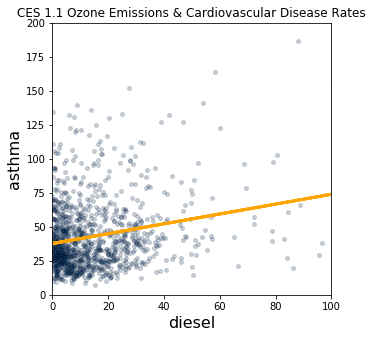

In [40]:
ces1_1_data.scatter("diesel", "asthma", alpha = .20, s = 15) #normal scatter plot
fig = plots.plot(ces1_1_data.column('diesel'), y(ces1_1_data.column('diesel')), c = 'orange', lw = 3) #drawing the regression line
plots.title("CES 1.1 Ozone Emissions & Cardiovascular Disease Rates"), plots.xlim(0,100), plots.ylim(0,200);

In [41]:
fig = plots.figure()

plots.savefig('test.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

The gold line above is the equation of the line I derived: <span style='color: orange'>$Y = 0.36*X + 37.72$</span>. This line created by the equation in yellow is the **best** linear predictor of the data. With this data, I can begin to make predictions about how many asthma incidents a census tract will report based on the amount of diesel on and off-road emissions it has. For example, a census tract that reported diesel emissions of 60kg/day would most likely report about 60 cases of asthma per 10,000 population. While a census tract with diesel emissions of about 20kg/day would most likely report 45 cases of astham per 10,000 population.

Conveniently, the `.scatter()` function has a setting that allows me to draw the regression line within the scatterplot (without doing any calculations): all I do is to specify `fit_line = True`. Run the cell below and compare it to the plot above.

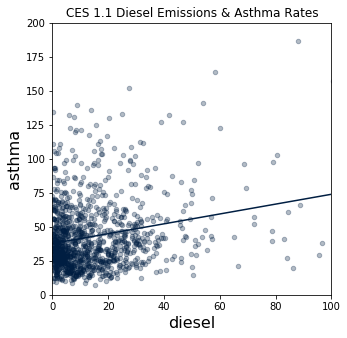

In [42]:
ces1_1_data.scatter("diesel", "asthma", fit_line=True, alpha = .30, s = 20)
plots.title("CES 1.1 Diesel Emissions & Asthma Rates"), plots.xlim(0,100), plots.ylim(0,200);

Now I will run the analysis for CES 2.0.

In [43]:
slope_of_reg_line = slope(ces2_data, "diesel", "asthma")
slope_of_reg_line

0.2637659030631211

In [44]:
intercept_of_reg_line = intercept(ces2_data, "diesel", "asthma")
intercept_of_reg_line

39.67659593246384

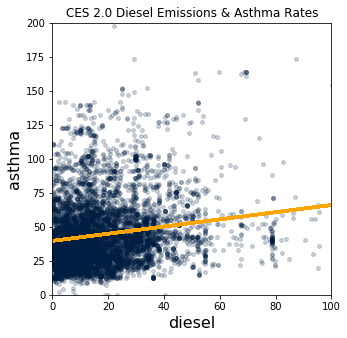

In [45]:
ces2_data.scatter("diesel", "asthma", alpha = .20, s = 15)
plots.plot(ces2_data.column('diesel'), y(ces2_data.column('diesel')), c = 'orange', lw = 3)
plots.title("CES 2.0 Diesel Emissions & Asthma Rates"), plots.xlim(0,100), plots.ylim(0,200);

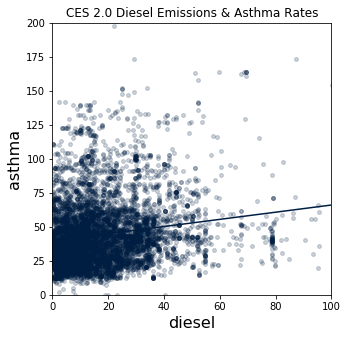

In [46]:
ces2_data.scatter("diesel", "asthma", fit_line=True, alpha = .20, s = 15)
plots.title("CES 2.0 Diesel Emissions & Asthma Rates"), plots.xlim(0,100), plots.ylim(0,200);

Analysis for CES 3.0 and Bay Area Counties

In [47]:
slope_of_reg_line = slope(bay_counties, "diesel", "asthma")
slope_of_reg_line

0.25326362449635653

In [48]:
intercept_of_reg_line = intercept(ces3_data, "diesel", "asthma")
intercept_of_reg_line

45.78600976061181

In [49]:
slope_of_reg_line = slope(bay_counties, "ozone", "cardiovascular_disease")
slope_of_reg_line

223.7508705693297

Text(0, 0.5, 'Cardiovascular Disease Rate (Per 10,000)')

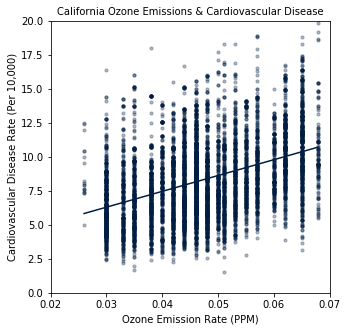

In [50]:
ces3_data.scatter("ozone", "cardiovascular_disease", fit_line=True, alpha = .3, s = 10)
plots.plot(ces3_data.column('ozone'), y(ces3_data.column('ozone')),  c = 'r', lw = 2)
plots.title("California Ozone Emissions & Cardiovascular Disease", fontsize=10), plots.xlim(0.02,.07), plots.ylim(0,20);
plots.xlabel('Ozone Emission Rate (PPM)', fontsize=10)
plots.ylabel('Cardiovascular Disease Rate (Per 10,000)', fontsize=10)

Text(0, 0.5, 'Cardiovascular Disease Rate (Per 10,000)')

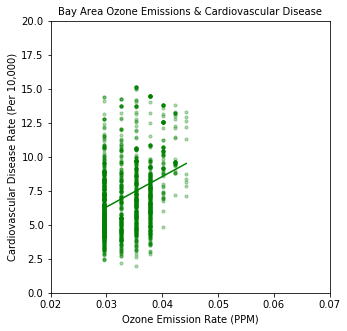

In [51]:
bay_counties.scatter("ozone", "cardiovascular_disease", fit_line=True, color = 'g', alpha = .3, s = 10)
plots.plot(bay_counties.column('ozone'), y(bay_counties.column('ozone')),  c = 'r', lw = 2)
plots.title("Bay Area Ozone Emissions & Cardiovascular Disease", fontsize=10), plots.xlim(0.02,.07), plots.ylim(0,20);
plots.xlabel('Ozone Emission Rate (PPM)', fontsize=10)
plots.ylabel('Cardiovascular Disease Rate (Per 10,000)', fontsize=10)

Text(0, 0.5, 'Asthma Rate (Per 10,000)')

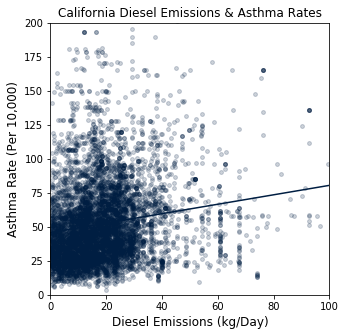

In [52]:
ces3_data.scatter("diesel", "asthma", fit_line=True, alpha = .20, s = 15)
plots.title("California Diesel Emissions & Asthma Rates", fontsize=12), plots.xlim(0,100), plots.ylim(0,200);
plots.xlabel('Diesel Emissions (kg/Day)', fontsize=12)
plots.ylabel('Asthma Rate (Per 10,000)', fontsize=12)

Text(0, 0.5, 'Asthma Rate (Per 10,000)')

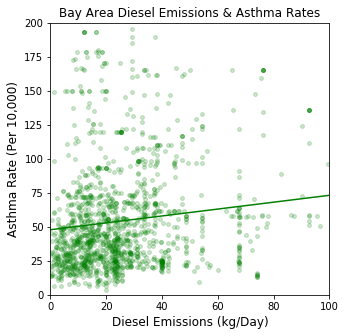

In [53]:
bay_counties.scatter("diesel", "asthma", fit_line=True, color = 'g', alpha = .20, s = 15)
plots.title("Bay Area Diesel Emissions & Asthma Rates", fontsize=12), plots.xlim(0,100), plots.ylim(0,200);
plots.xlabel('Diesel Emissions (kg/Day)', fontsize=12)
plots.ylabel('Asthma Rate (Per 10,000)', fontsize=12)

Below I will run code in order to calculate the coefficient of determiniation (R-Squared) for the variables of interest from CES 3.0. 

In [54]:
print('r: ', correlation(ces3_data, 'ozone', 'cardiovascular_disease'))

r:  0.4061368776914048


r:  0.18918064228606032


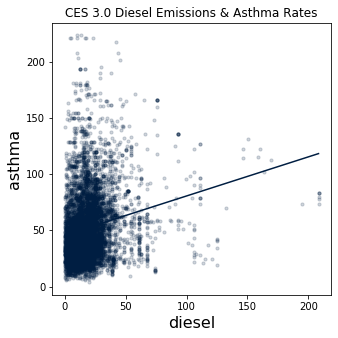

In [55]:
print('r: ', correlation(ces3_data, 'diesel', 'asthma'))
ces3_data.scatter("diesel", "asthma", fit_line=True, alpha = .18, s = 10)
plots.title("CES 3.0 Diesel Emissions & Asthma Rates");

r-squared:  0.03578931541576631


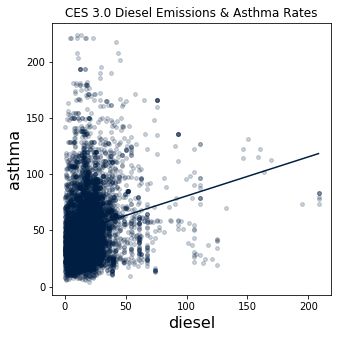

In [56]:
print('r-squared: ', correlation(ces3_data, 'diesel', 'asthma')**2)
ces3_data.scatter("diesel", "asthma", fit_line=True, alpha = .20, s = 15)
plots.title("CES 3.0 Diesel Emissions & Asthma Rates");

**correlation coefficient:**

As we would assume, diesel is correlated with asthma. But `r = 0.036` is a weak relationship.

Now I will run the cell below to find the value of r-squared for the above plot.

`R-squared = 0.036`. This very low r-squared means that the above model analyzing the relationship between diesel and asthma is not a good predictor of asthma. However, I will return to R-squared later on when I conduct multiple regression in order develop more accurate models that take into account cumulative measures of pollution and negative health outcomes.


Below I will conduct regression analysis using CES 3.0 Score and Asthma from CES 3.0. Since CES 3.0 Score takes into account all of the variables in the data table, it is another effective way to understand the cummulative effects of pollution and socioecomomic factors on negative health outcomes.

r:  0.5452274394377603


Text(0, 0.5, 'Asthma Rate (Per 10,000)')

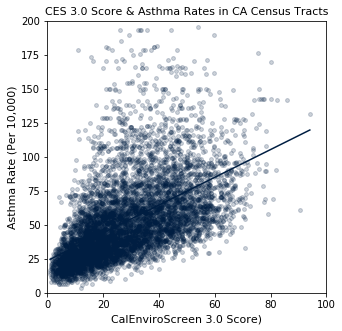

In [57]:
print('r: ', correlation(ces3_data, 'ces_3_score', 'asthma'))
ces3_data.scatter("ces_3_score", "asthma", fit_line=True, alpha = .2, s = 15)
plots.title("CES 3.0 Score & Asthma Rates in CA Census Tracts", fontsize=11), plots.xlim(0,100), plots.ylim(0,200);
plots.xlabel('CalEnviroScreen 3.0 Score)', fontsize=11)
plots.ylabel('Asthma Rate (Per 10,000)', fontsize=11)

In [58]:
model = sm.ols(formula='cardiovascular_disease ~ ozone', data = ces3_data)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     cardiovascular_disease   R-squared:                       0.165
Model:                                OLS   Adj. R-squared:                  0.165
Method:                     Least Squares   F-statistic:                     1492.
Date:                    Tue, 07 Jul 2020   Prob (F-statistic):          4.25e-298
Time:                            22:12:05   Log-Likelihood:                -18159.
No. Observations:                    7557   AIC:                         3.632e+04
Df Residuals:                        7555   BIC:                         3.634e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8049      0.146     19.186      0.000       2.518       3.091
ozone        116.4666      3.015     38.631      0.000     110.557     122.377
==============================================================================
Omnibus:                      517.003   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.129
Skew:                           0.660   Prob(JB):                    4.46e-139
Kurtosis:                       3.529   Cond. No.                         98.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
model = sm.ols(formula='cardiovascular_disease ~ ozone', data = bay_counties)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     cardiovascular_disease   R-squared:                       0.106
Model:                                OLS   Adj. R-squared:                  0.105
Method:                     Least Squares   F-statistic:                     178.3
Date:                    Tue, 07 Jul 2020   Prob (F-statistic):           1.63e-38
Time:                            22:12:05   Log-Likelihood:                -3516.1
No. Observations:                    1507   AIC:                             7036.
Df Residuals:                        1505   BIC:                             7047.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4002      0.569     -0.704      0.482      -1.516       0.716
ozone        223.7509     16.758     13.352      0.000     190.879     256.622
==============================================================================
Omnibus:                      126.472   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.407
Skew:                           0.768   Prob(JB):                     6.60e-35
Kurtosis:                       3.385   Cond. No.                         261.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
%matplotlib notebook

model = sm.ols(formula='asthma ~ diesel + pm_2_5 + drinking_water + pesticides + toxic_releases + traffic + cleanup_sites + groundwater_threats + hazardous_waste + education + linguistic_isolation + poverty + unemployment + housing_burden', data = ces3_data)
fit = model.fit()

In [61]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 asthma   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:12:05   Log-Likelihood:                -34804.
No. Observations:                7557   AIC:                         6.964e+04
Df Residuals:                    7542   BIC:                         6.974e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               23.4887      1.361     17.254      0.000      20.820      26.157
diesel                   0.2489      0.019     13.007      0.000       0.211       0.286
pm_2_5                   0.1567      0.126      1.243      0.214      -0.091       0.404
drinking_water          -0.0190      0.001    -15.198      0.000      -0.021      -0.017
pesticides            1.488e-05      0.000      0.141      0.888      -0.000       0.000
toxic_releases          -0.0001   2.23e-05     -6.247      0.000      -0.000   -9.57e-05
traffic                 -0.0014      0.000     -4.222      0.000      -0.002      -0.001
cleanup_sites            0.0804      0.021      3.864      0.000       0.040       0.121
groundwater_threats      0.0443      0.009      5.026      0.000       0.027       0.062
hazardous_waste          0.5363      0.228      2.351      0.019       0.089       0.983
education                0.3498      0.037      9.425      0.000       0.277       0.423
linguistic_isolation    -0.7865      0.044    -17.749      0.000      -0.873      -0.700
poverty                  0.5595      0.032     17.585      0.000       0.497       0.622
unemployment             1.3573      0.075     18.136      0.000       1.211       1.504
housing_burden          -0.0450      0.048     -0.929      0.353      -0.140       0.050
==============================================================================
Omnibus:                     2344.160   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9836.234
Skew:                           1.474   Prob(JB):                         0.00
Kurtosis:                       7.748   Cond. No.                     6.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Below, I created histograms to visualize the distribution of different EJ issues across the four geographies I ultimately analyzed: the entire state of California, the Bay Area, San Fransisco, and Oakland. 

<IPython.core.display.Javascript object>


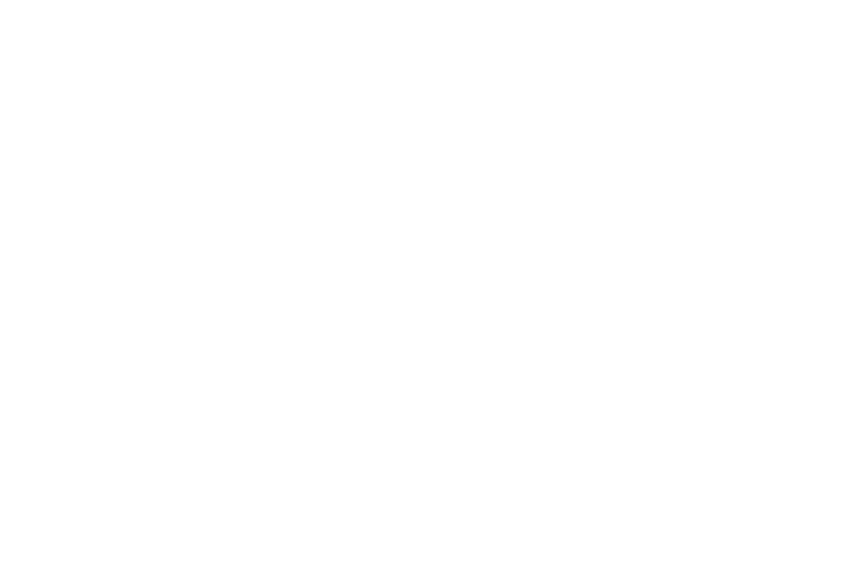

<IPython.core.display.Javascript object>


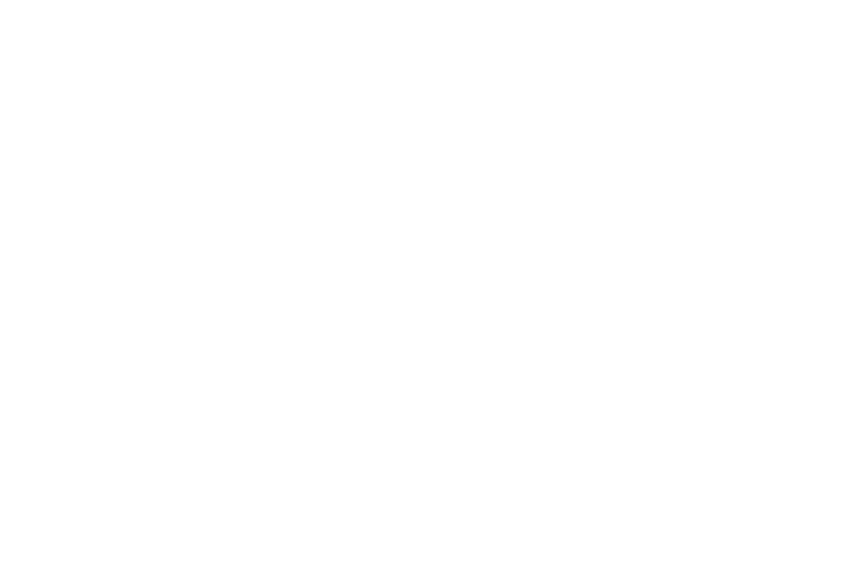

In [62]:
df['housing_burden'].plot.hist()
plots.title("Frequency of Housing Burdened Rates"); 
plots.xlabel('Percent Households Rent Burdened')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


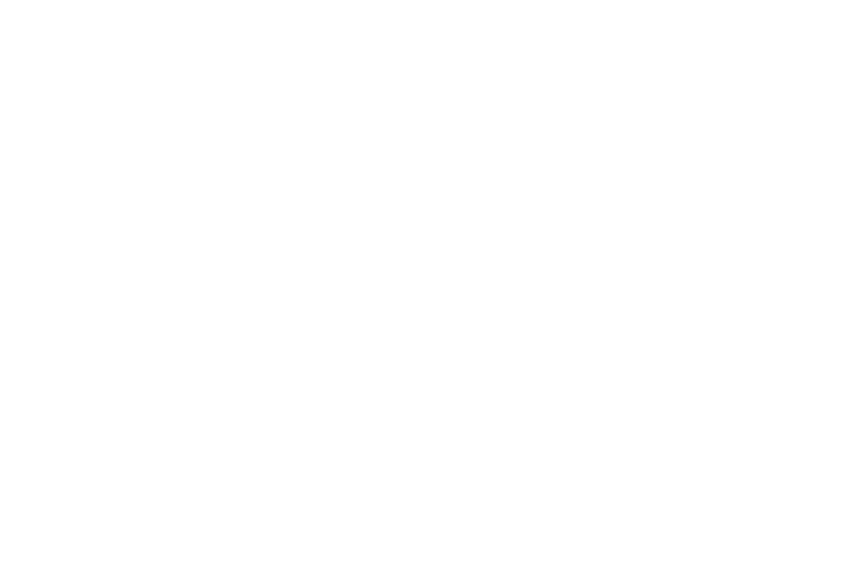

<IPython.core.display.Javascript object>


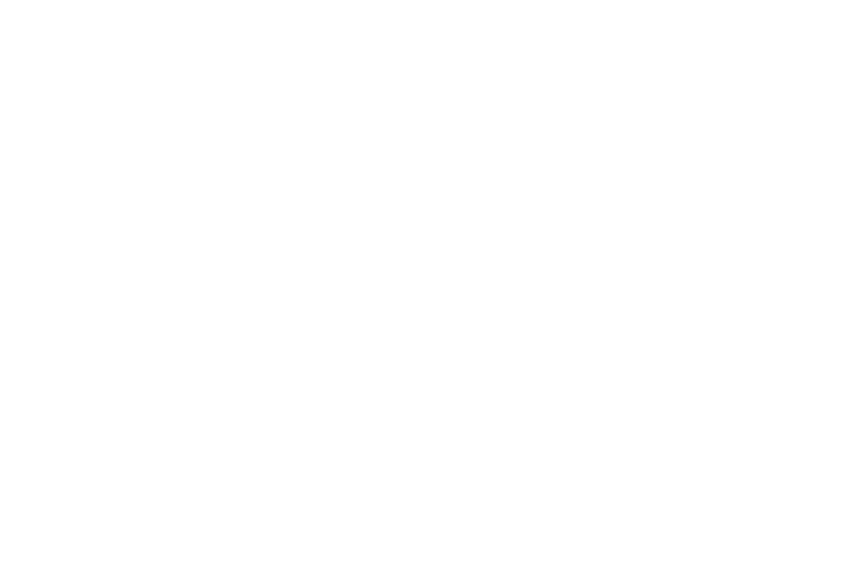

In [63]:
df['low_birth_weight'].plot.hist()
plots.title("Frequency of Low Birth Weight Rates"); 

<IPython.core.display.Javascript object>


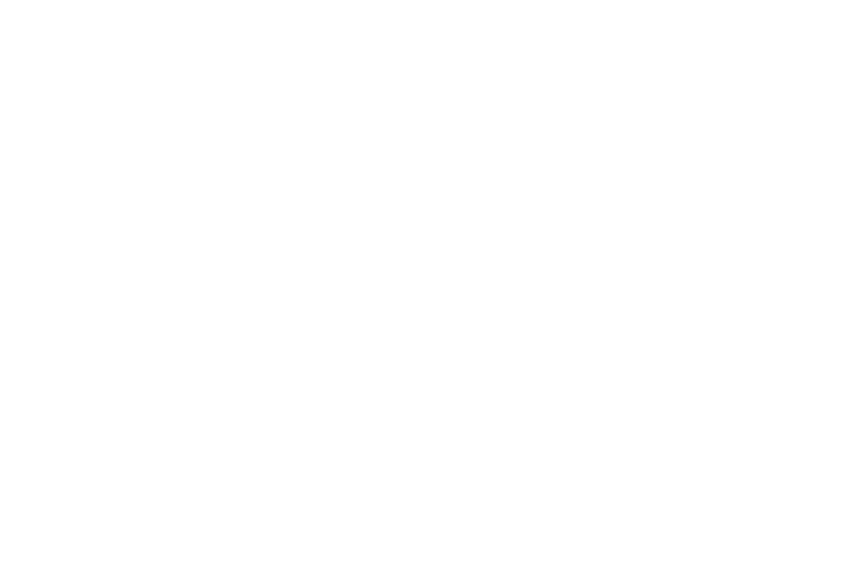

<IPython.core.display.Javascript object>


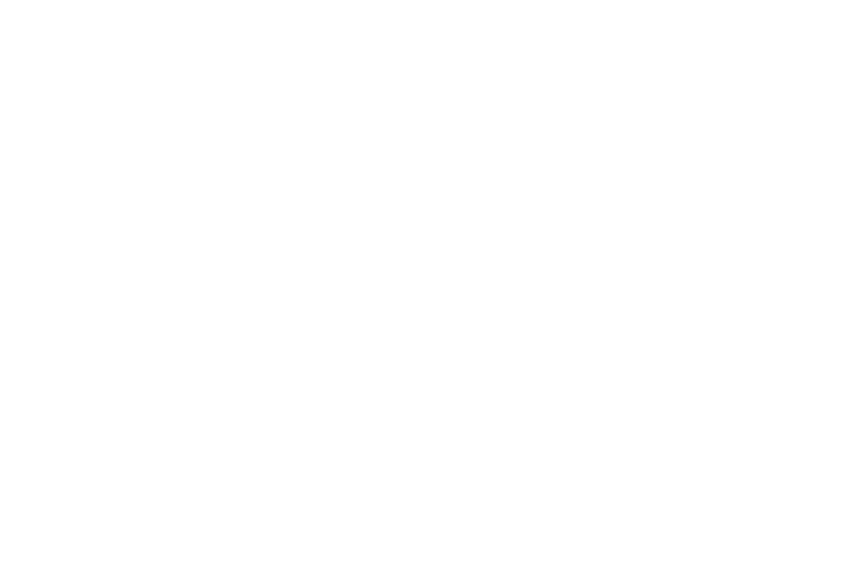

In [64]:
df['cleanup_sites'].plot.hist()
plots.title("Clean Up Site Amounts"); plots.xlim(0,130), plots.ylim(0,7500);

<IPython.core.display.Javascript object>


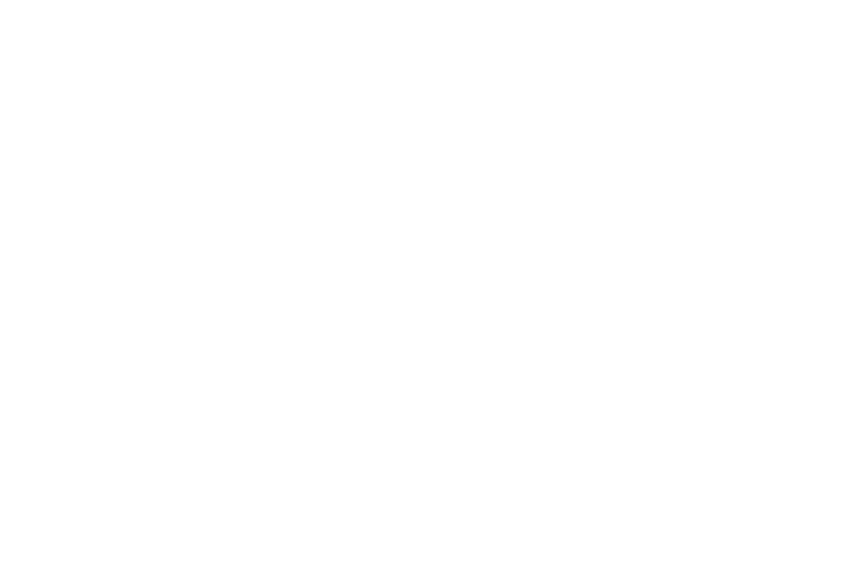

<IPython.core.display.Javascript object>


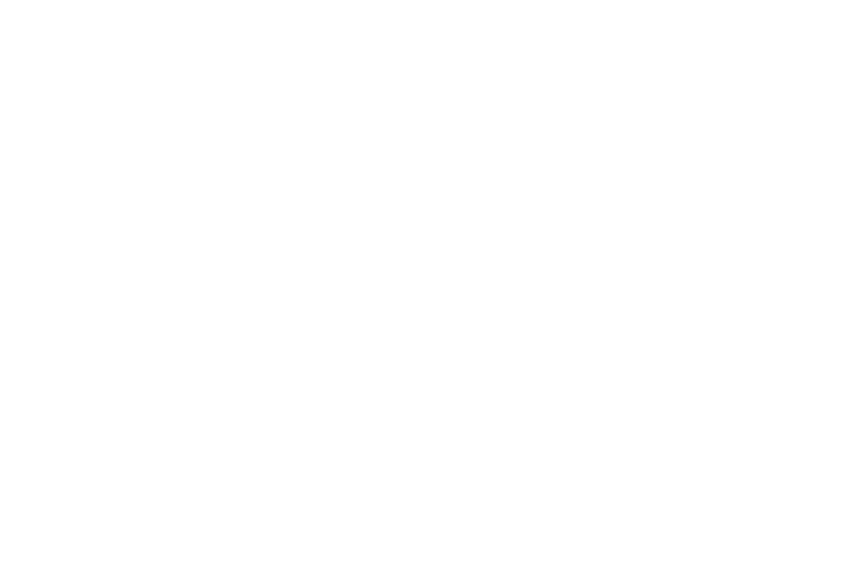

In [65]:
df['traffic'].plot.hist()
plots.title("Frequency of Trafic Rates"); plots.xlim(0,10000), plots.ylim(0,2000);

<IPython.core.display.Javascript object>


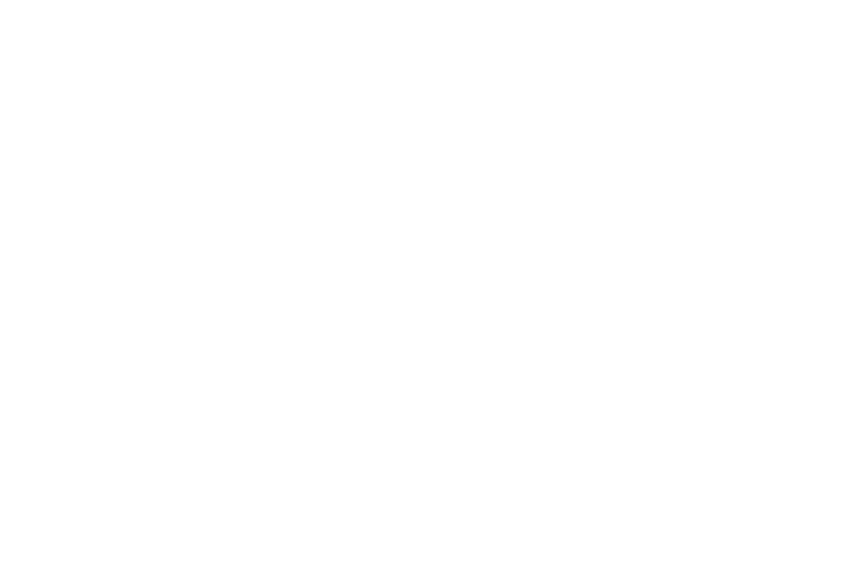

<IPython.core.display.Javascript object>


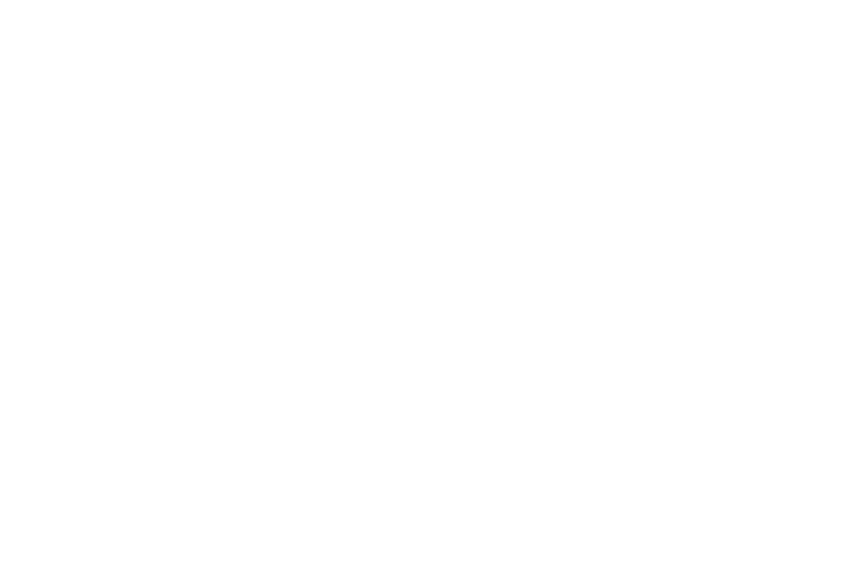

In [66]:
df['pesticides'].plot.hist()
plots.title("Frequency of Pesticide Rates"); plots.xlim(0,20000), plots.ylim(0,5000);

<IPython.core.display.Javascript object>


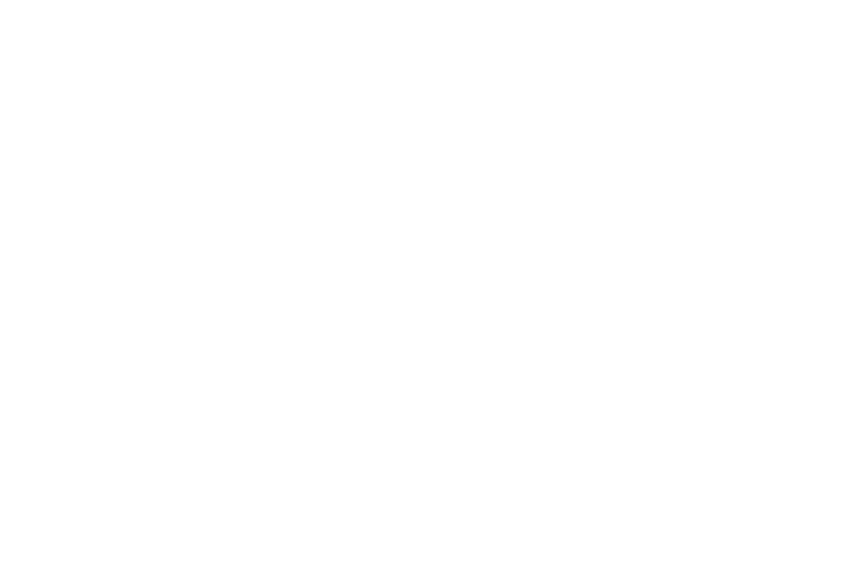

<IPython.core.display.Javascript object>


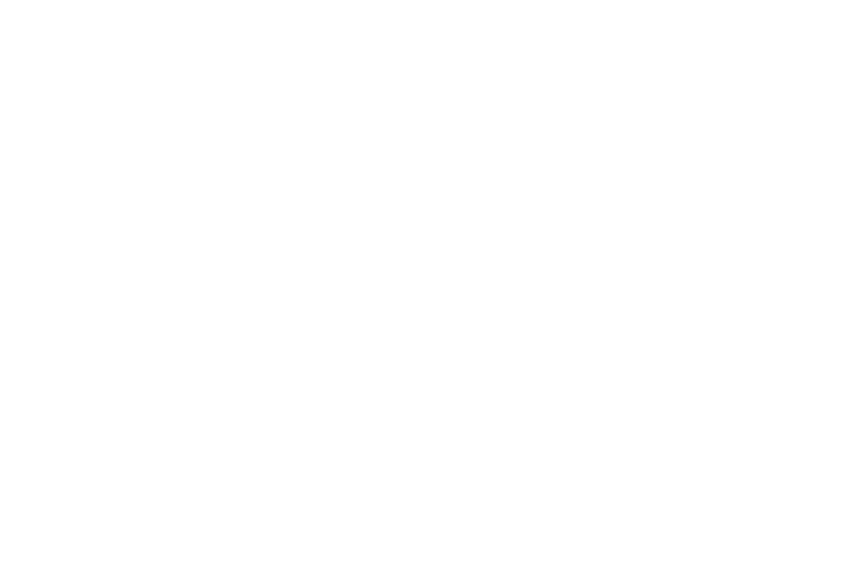

In [67]:
df['pm_2_5'].plot.hist()
plots.xlim(0,20), plots.ylim(0,2500);
plots.title("PM 2.5 Emission Rates in California Census Tracts");
plots.xlabel('PM 2.5 Emission Rates (μg/m3)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


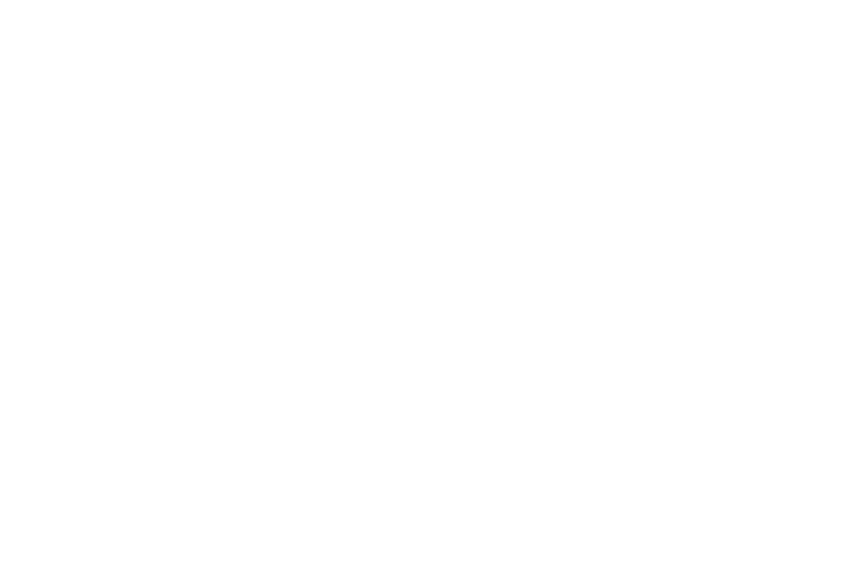

<IPython.core.display.Javascript object>


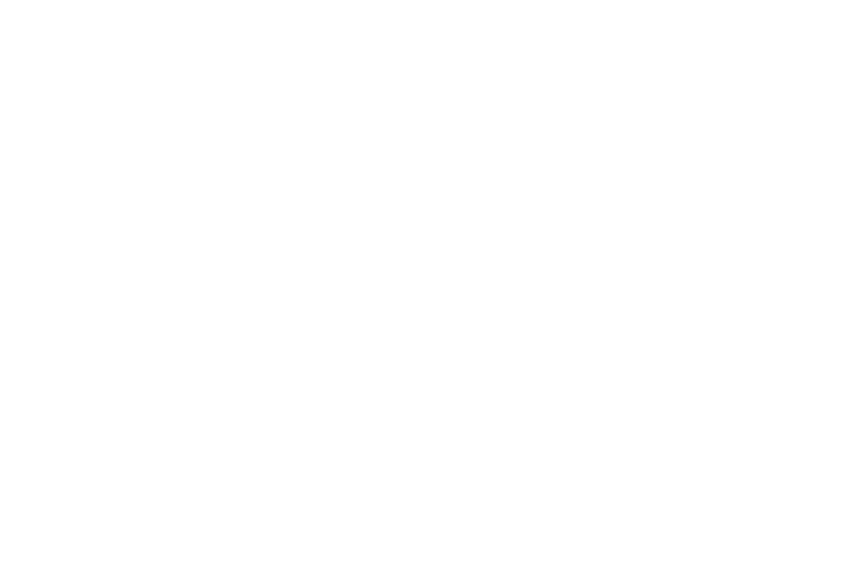

In [68]:
df_1['pm_2_5'].plot.hist(color='green')
plots.xlim(0,20), plots.ylim(0,600);
plots.title("PM 2.5 Emission Rates in Bay Area Census Tracts");
plots.xlabel('PM 2.5 Emission Rates (μg/m3)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


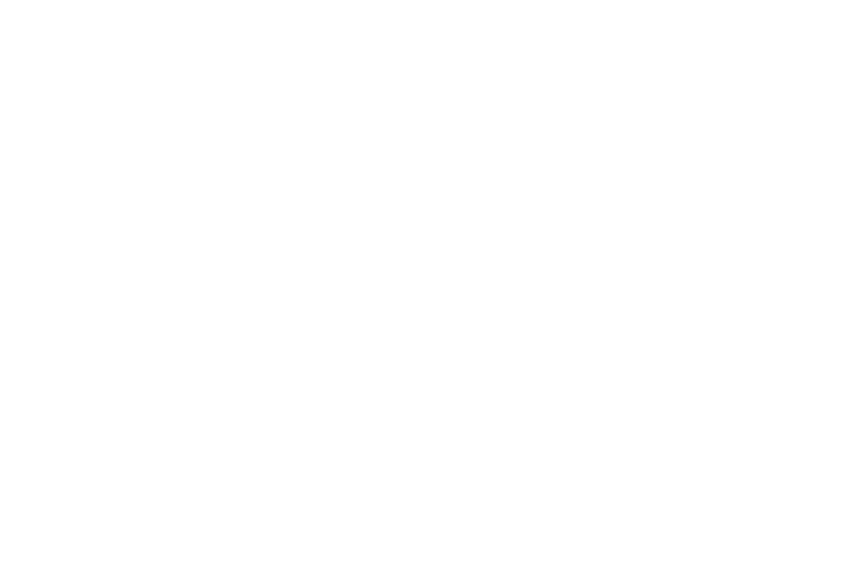

<IPython.core.display.Javascript object>


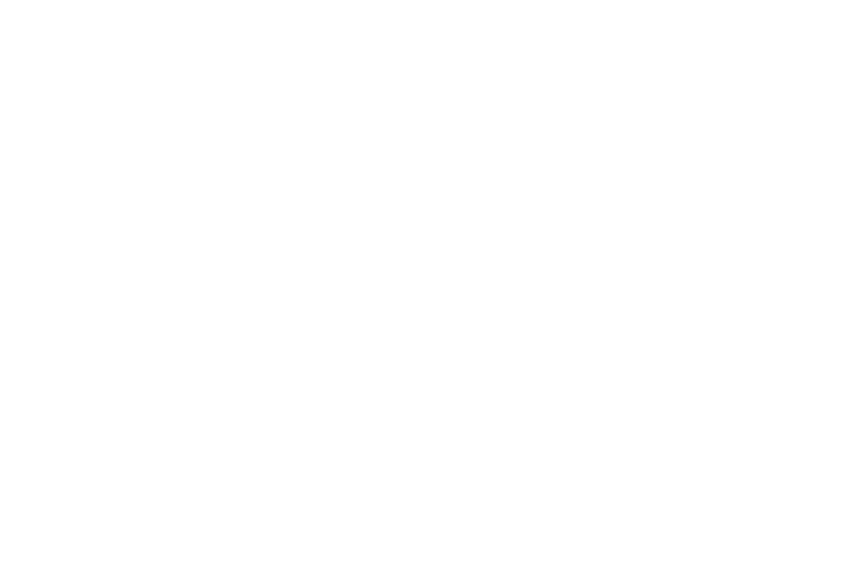

In [69]:
df_2['pm_2_5'].plot.hist(color='orange')
plots.title("Frequency of PM 2.5 Emissions Rates in San Francisco");
plots.xlabel('PM 2.5 Emissions Rates (μg/m3)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


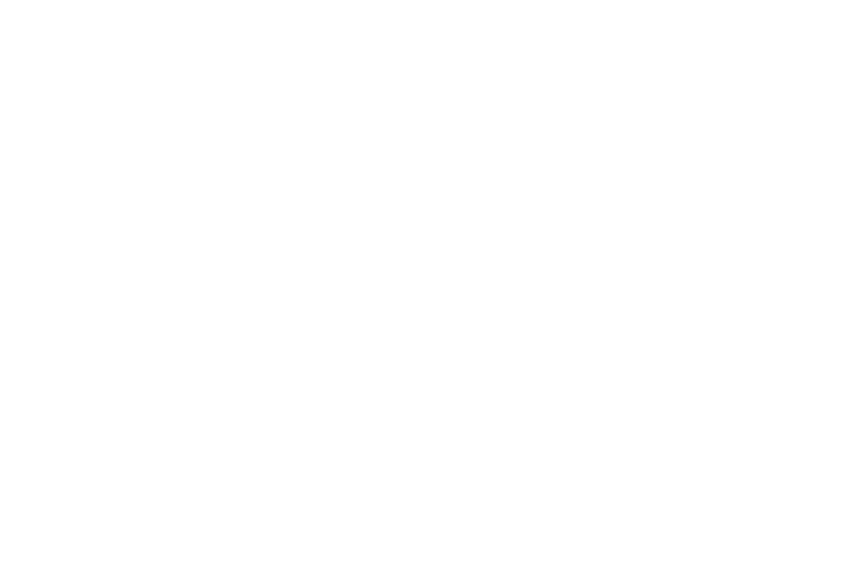

<IPython.core.display.Javascript object>


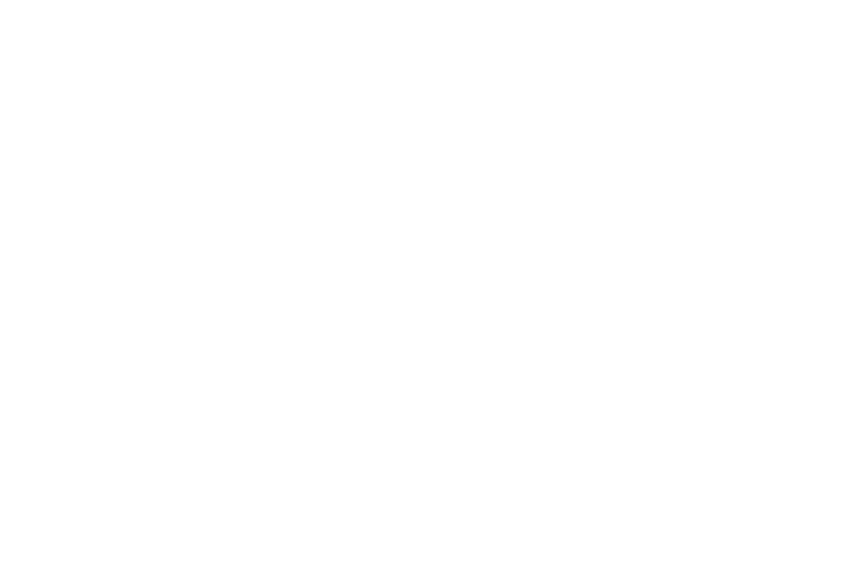

In [70]:
df_3['pm_2_5'].plot.hist(color='purple')
plots.title("Frequency of PM 2.5 Emissions Rates in Oakland");
plots.xlabel('PM 2.5 Emissions Rates (μg/m3)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


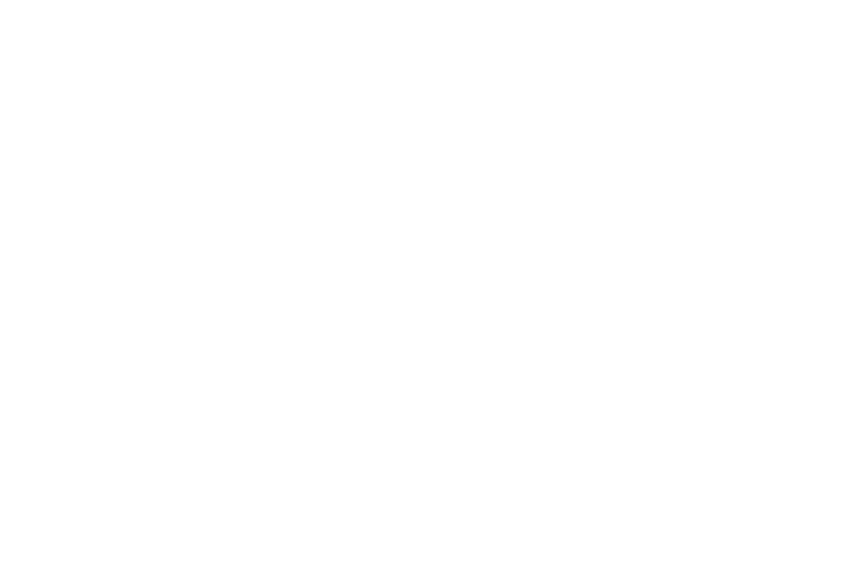

<IPython.core.display.Javascript object>


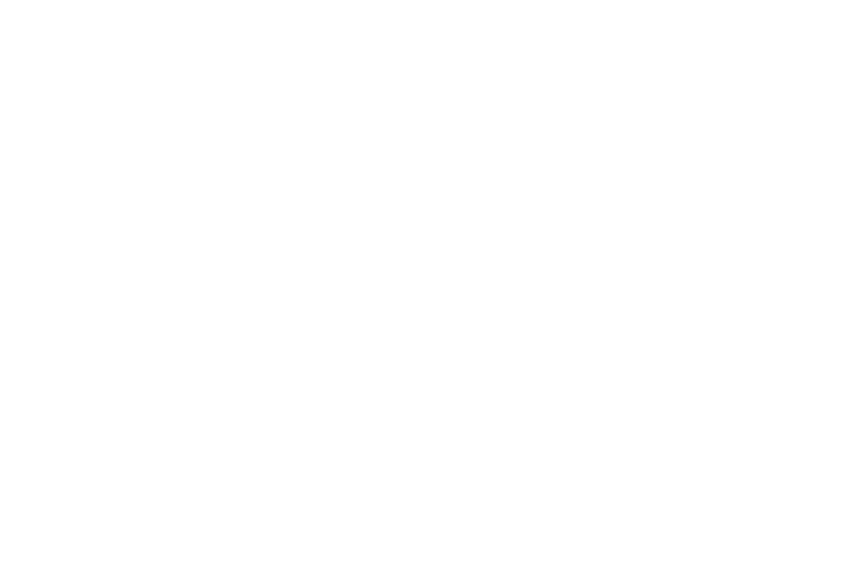

In [71]:
df['ozone'].plot.hist()
plots.title("Frequency of Ozone Emission Rates in California");
plots.xlabel('Ozone Emission Rates (PPM)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


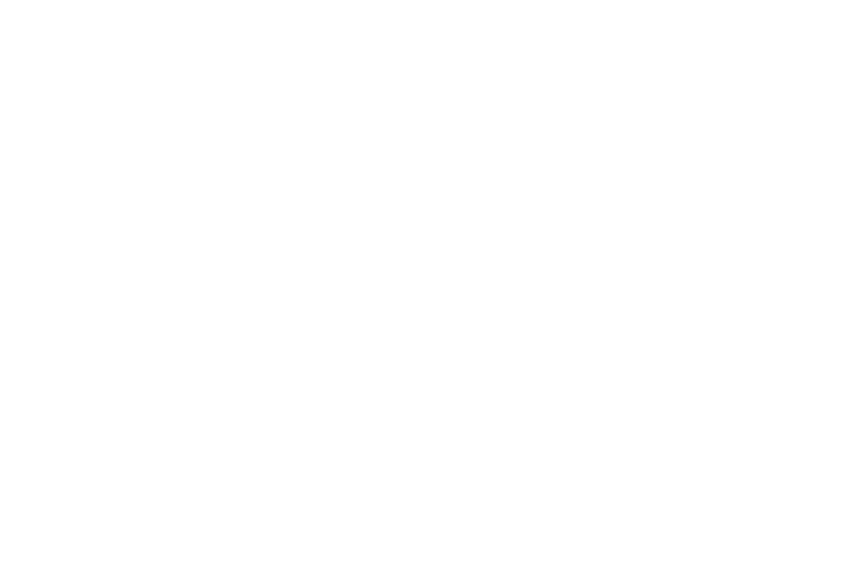

<IPython.core.display.Javascript object>


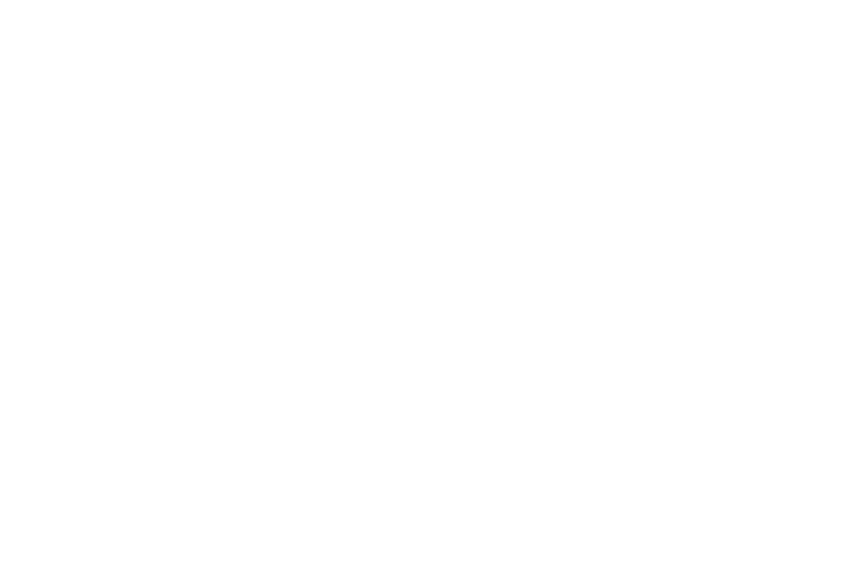

In [72]:
df_1['ozone'].plot.hist(color='green')
plots.title("Frequency of Ozone Emission Rates in the Bay Area");
plots.xlabel('Ozone Emission Rates (PPM)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


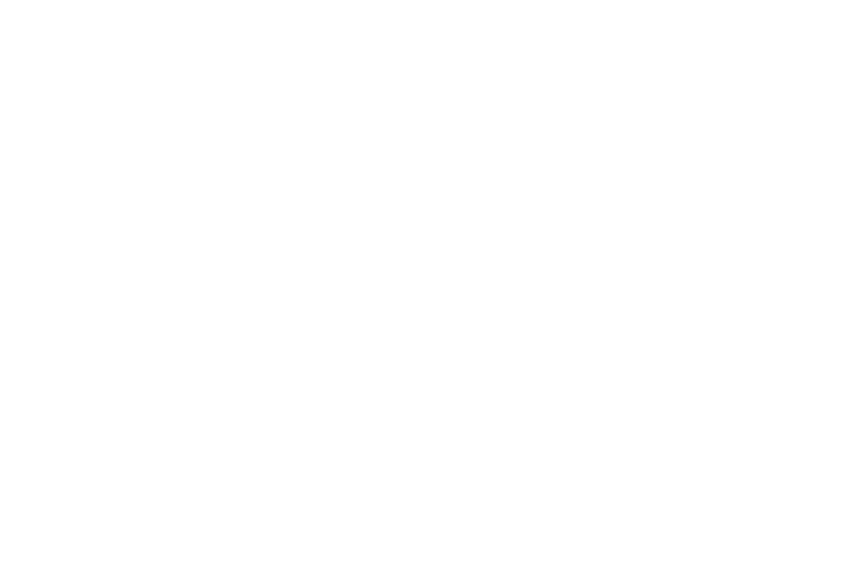

<IPython.core.display.Javascript object>


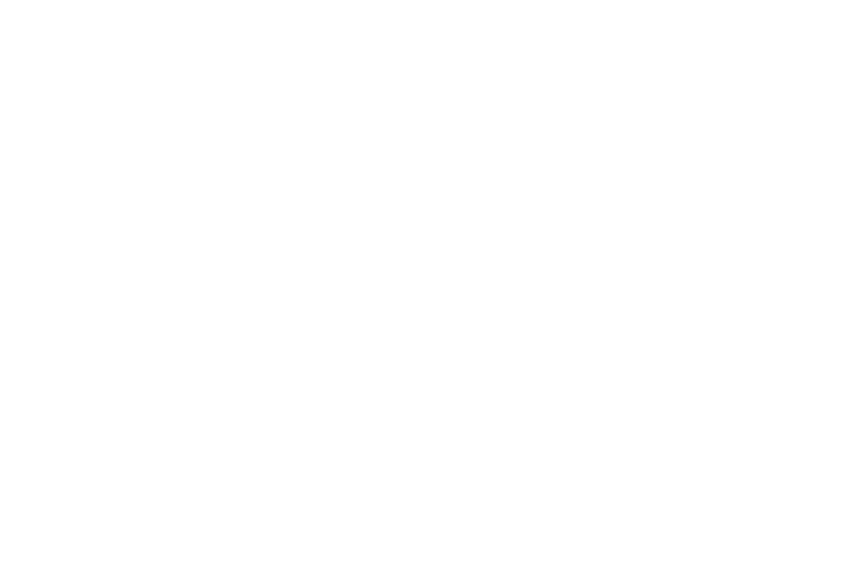

In [73]:
df_2['ozone'].plot.hist(color='orange')
plots.title("Frequency of Ozone Emissions Rates in San Francisco");
plots.xlabel('Ozone Emissions Rates (PPM)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


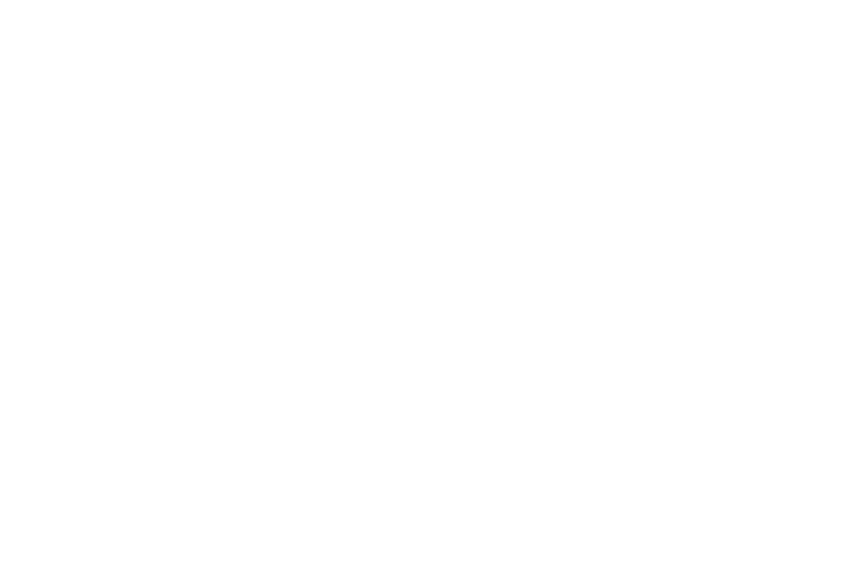

<IPython.core.display.Javascript object>


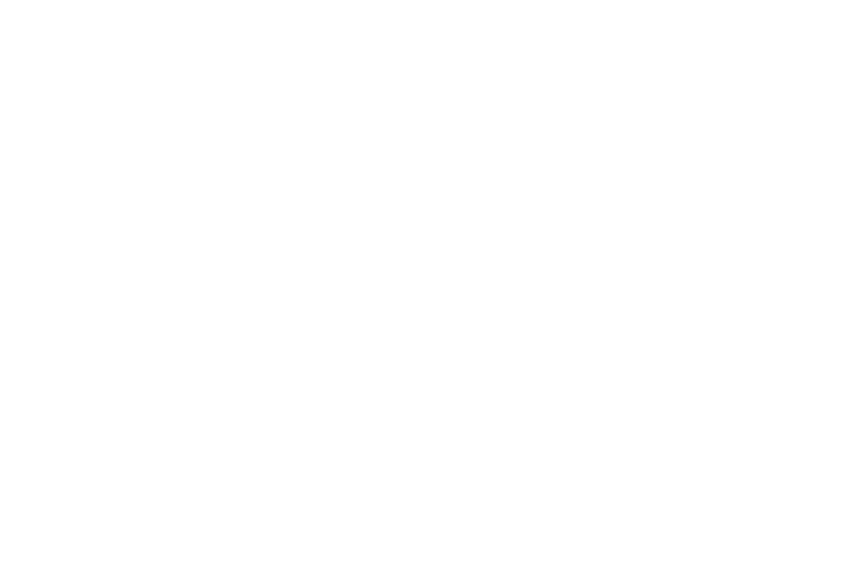

In [74]:
df_3['ozone'].plot.hist(color='purple')
plots.title("Frequency of Ozone Emissions Rates in Oakland");
plots.xlabel('Ozone Emissions Rates (PPM)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


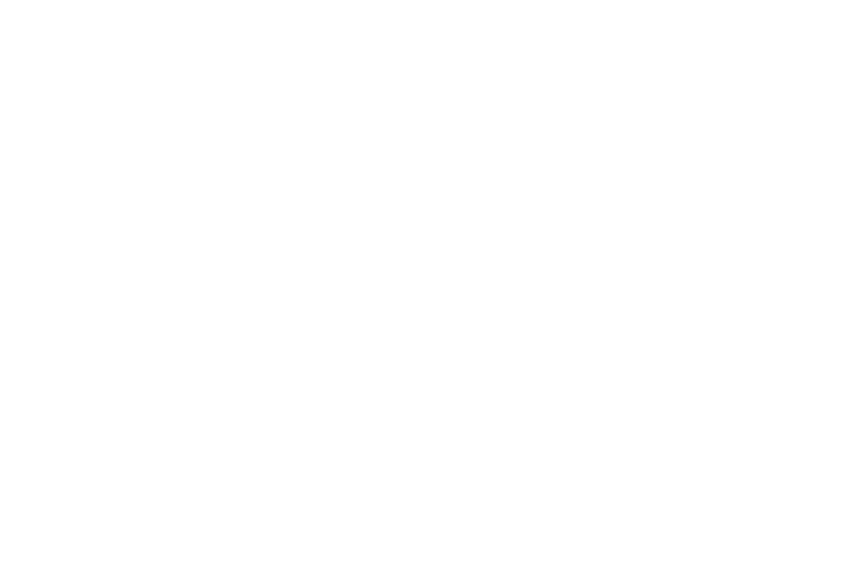

<IPython.core.display.Javascript object>


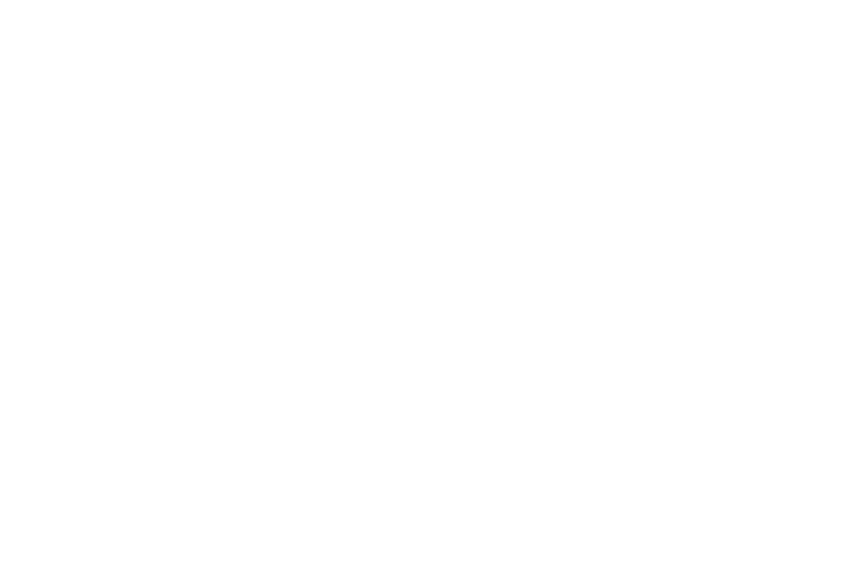

In [75]:
df['diesel'].plot.hist()
plots.title("Frequency of Diesel Emission Rates in California");
plots.xlim(0,120), plots.ylim(0,5000);
plots.xlabel('Diesel Emission Rates (kg/Day)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


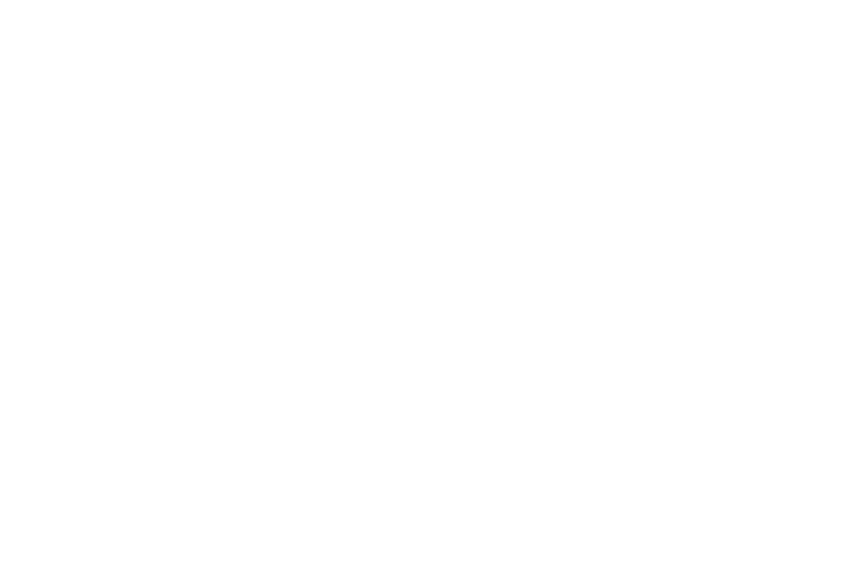

<IPython.core.display.Javascript object>


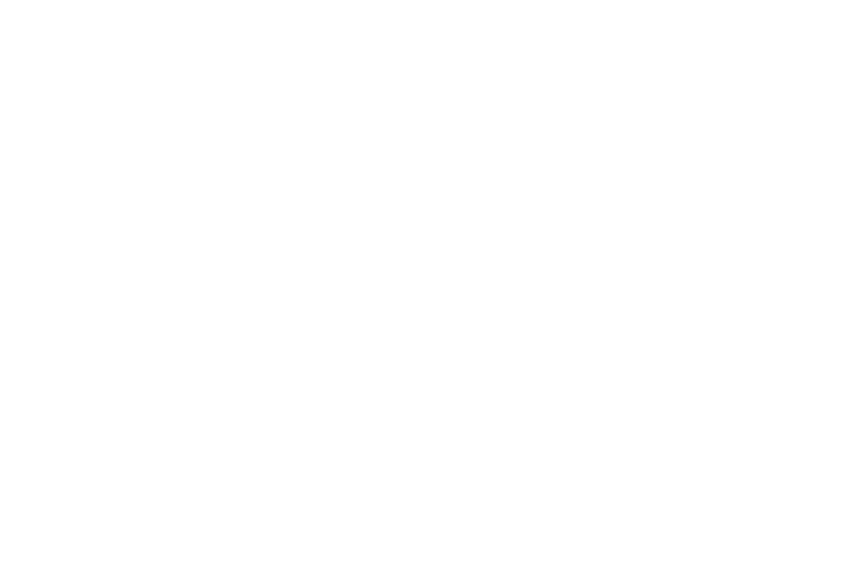

In [76]:
df_1['diesel'].plot.hist(color='green')
plots.title("Frequency of Diesel Emission Rates in the Bay Area");
plots.xlabel('Diesel Emission Rates (kg/Day)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


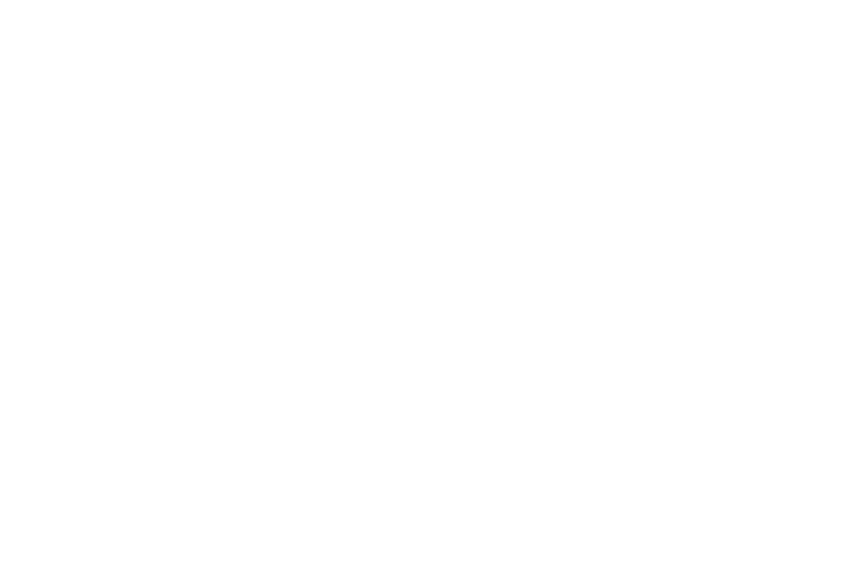

<IPython.core.display.Javascript object>


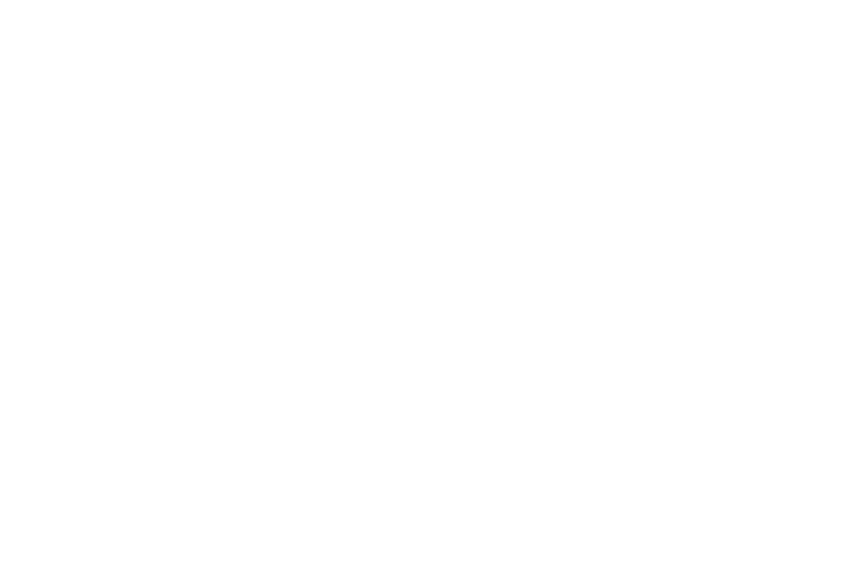

In [77]:
df_2['diesel'].plot.hist(color='orange')
plots.title("Frequency of Diesel Emission Rates in San Francisco");
plots.xlabel('Diesel Emission Rates (kg/Day)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


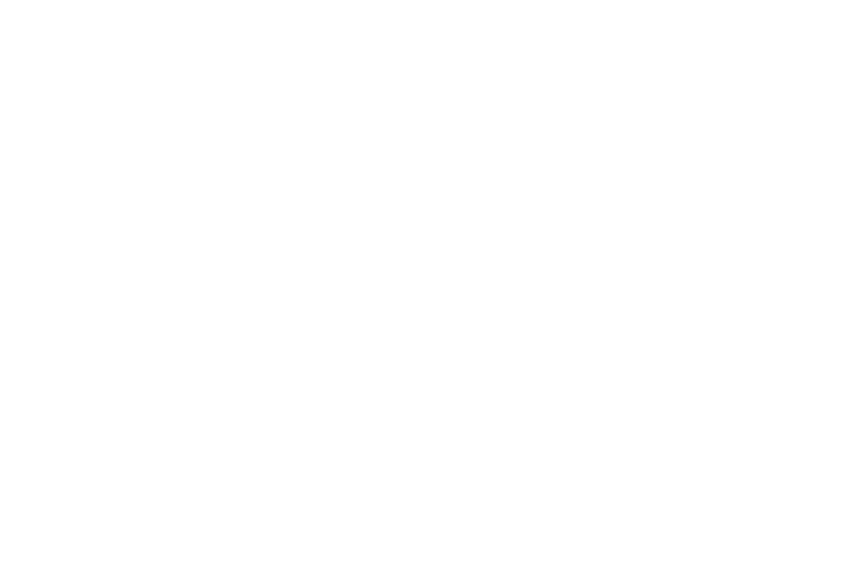

<IPython.core.display.Javascript object>


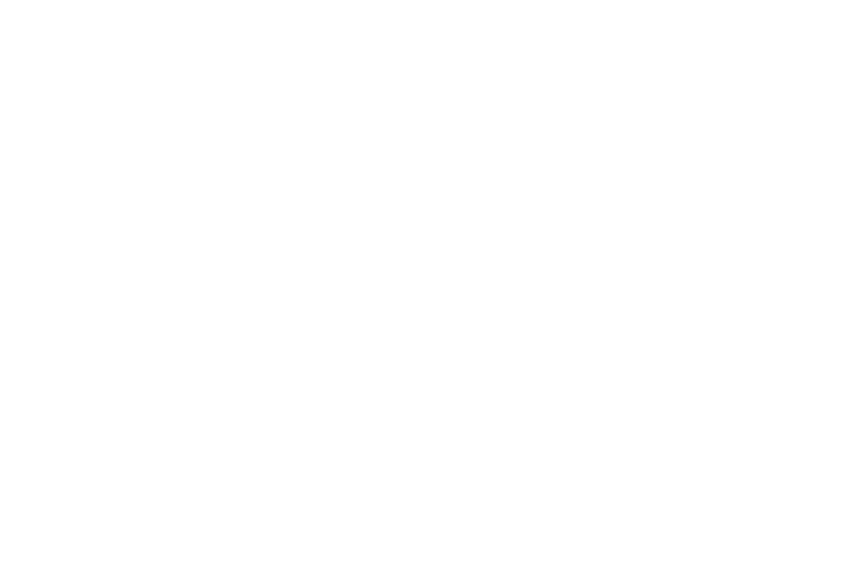

In [78]:
df_3['diesel'].plot.hist(color='purple')
plots.title("Frequency of Diesel Emission Rates in Oakland");
plots.xlabel('Diesel Emission Rates (kg/Day)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


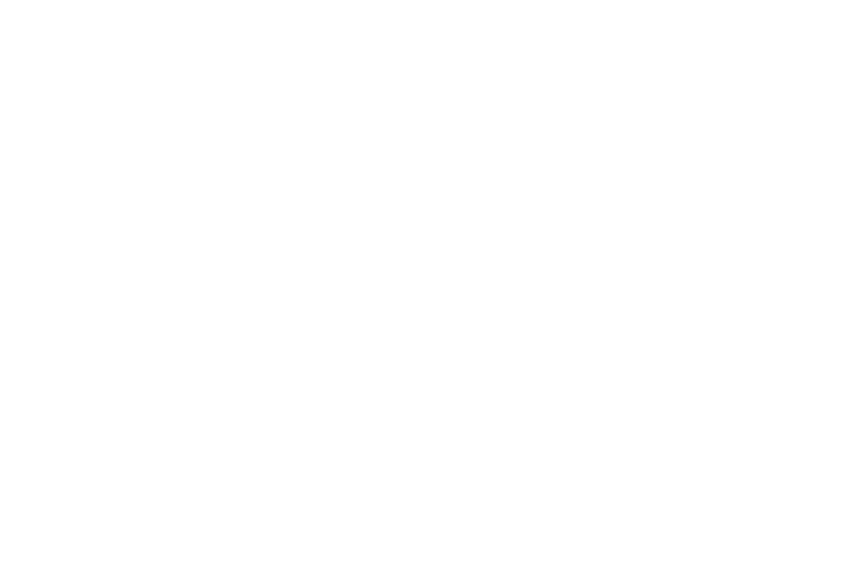

<IPython.core.display.Javascript object>


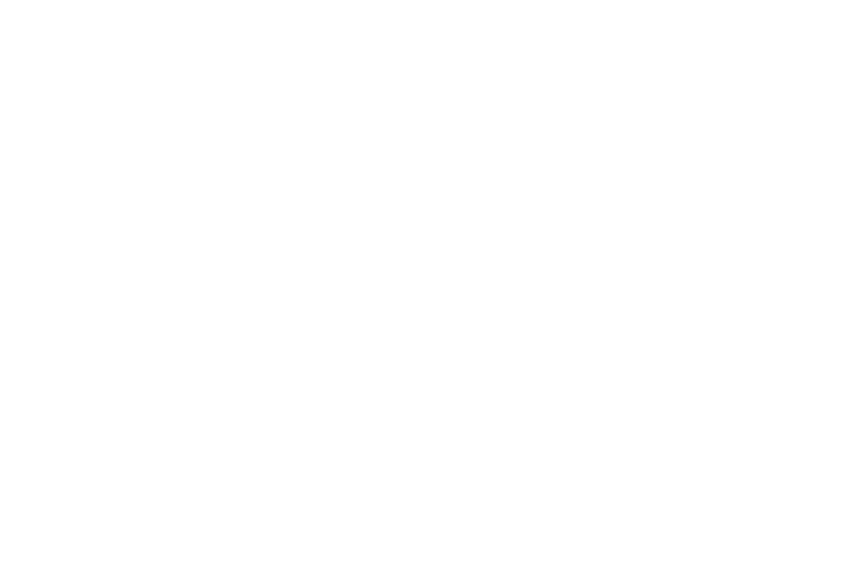

In [79]:
df['ces_3_score'].plot.hist()
plots.title("Frequency of CES 3.0 Scores");

<IPython.core.display.Javascript object>


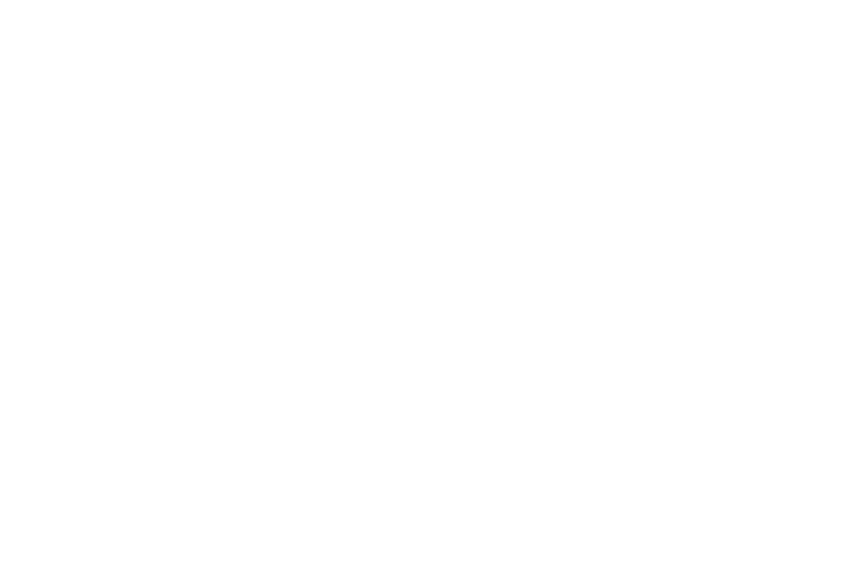

<IPython.core.display.Javascript object>


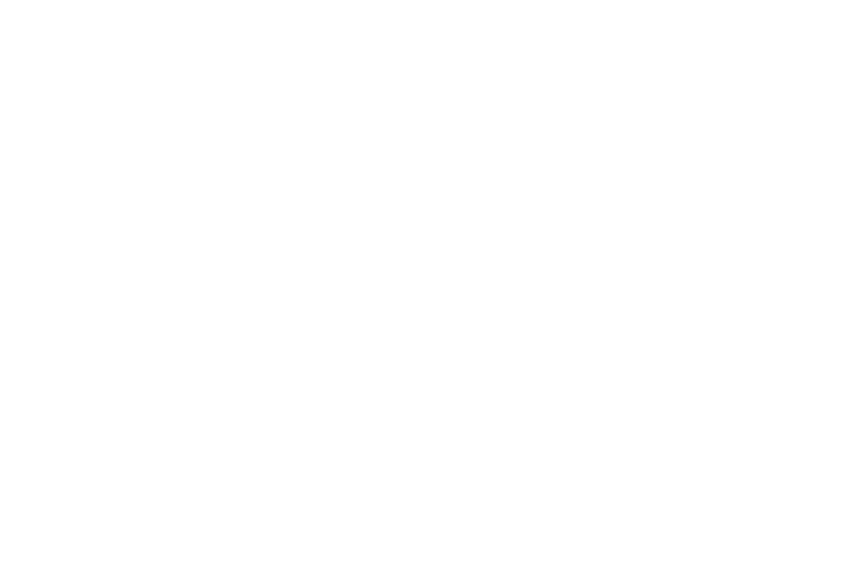

In [80]:
df['impaired_water_bodies'].plot.hist()
plots.title("Frequency of Impaired Water Bodies");

<IPython.core.display.Javascript object>


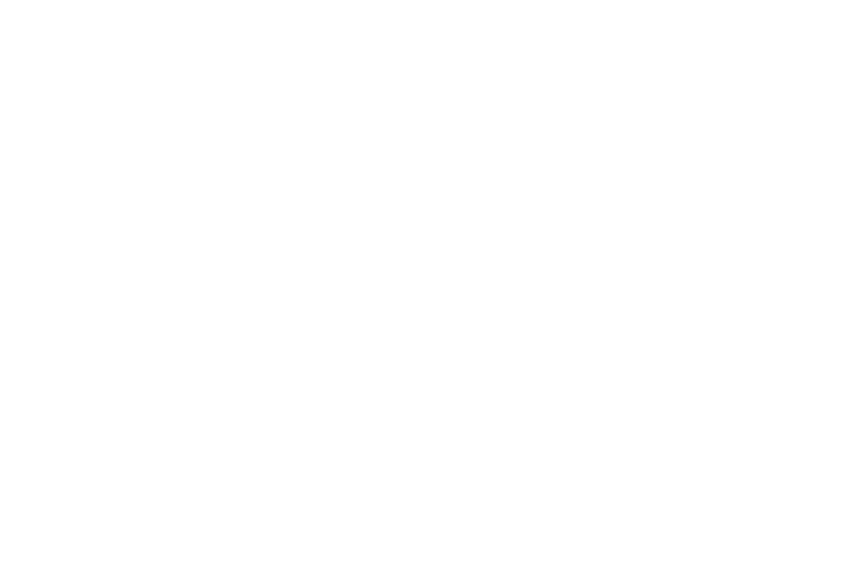

<IPython.core.display.Javascript object>


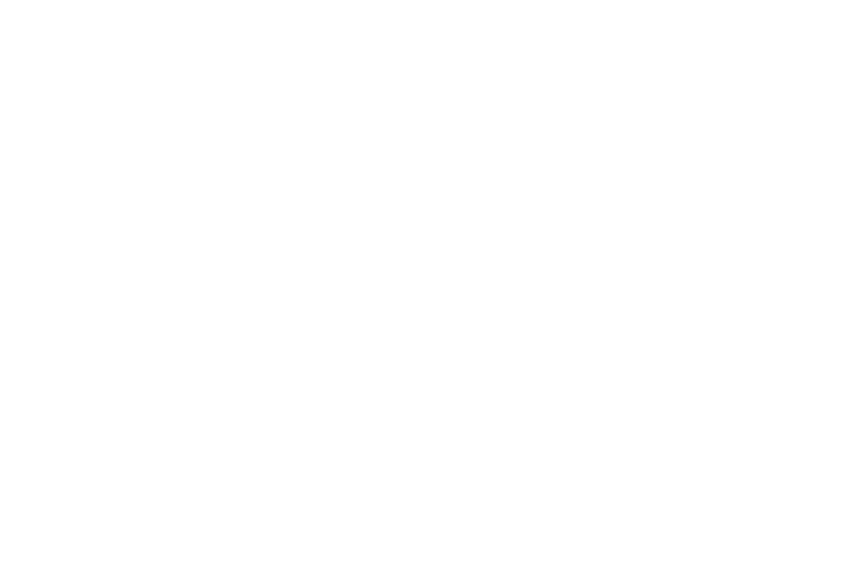

In [81]:
df['cardiovascular_disease'].plot.hist()
plots.title("Frequency of Cardiovascular Disease Rates in California");
plots.xlabel('Cardiovascular Disease Rate (Per 10,000)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


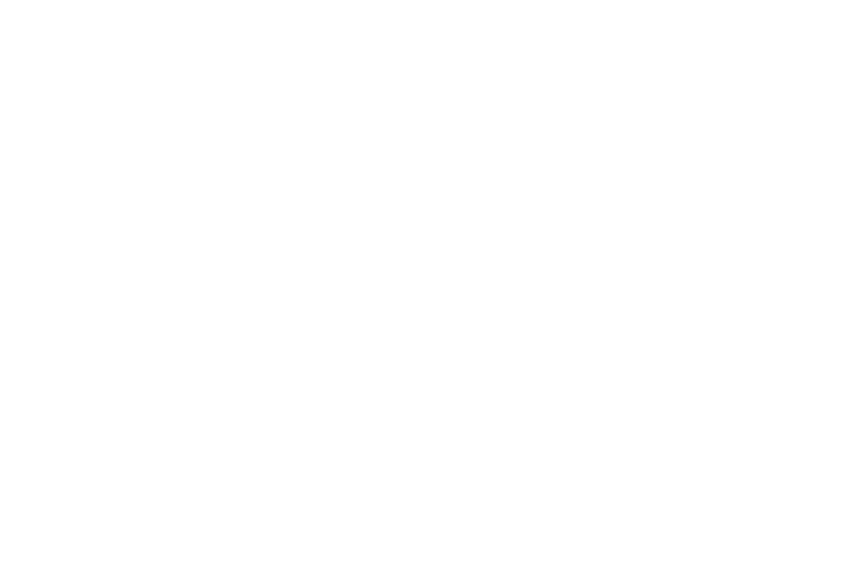

<IPython.core.display.Javascript object>


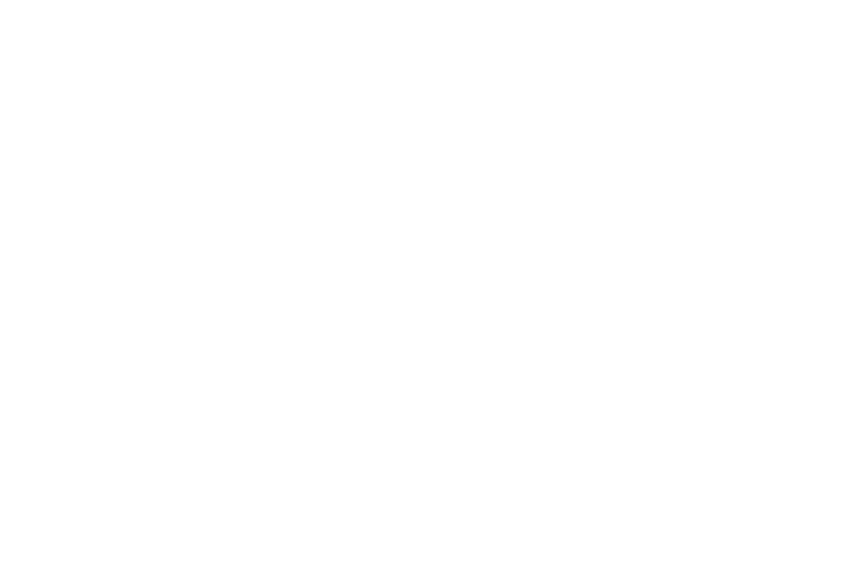

In [82]:
df_1['cardiovascular_disease'].plot.hist(color='green')
plots.title("Frequency of Cardiovascular Disease Rates in the Bay Area");
plots.xlabel('Cardiovascular Disease Rate (Per 10,000)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


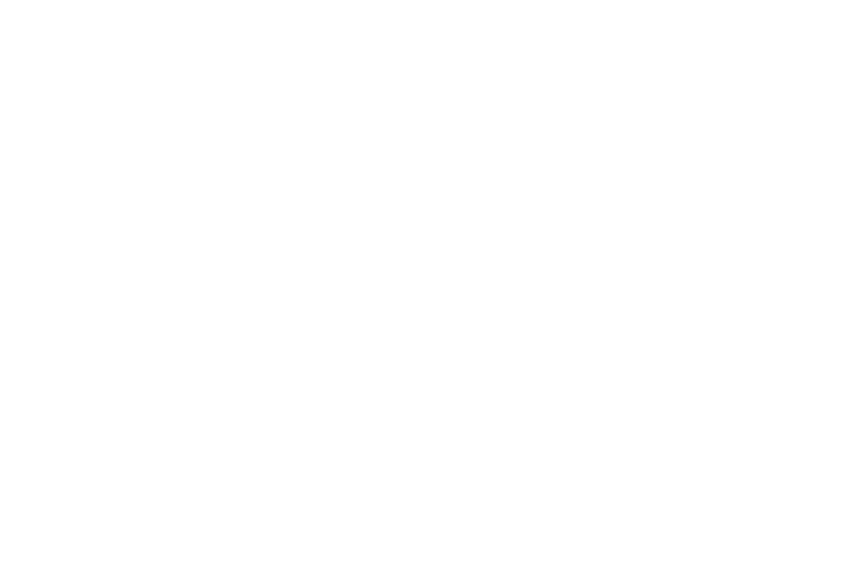

<IPython.core.display.Javascript object>


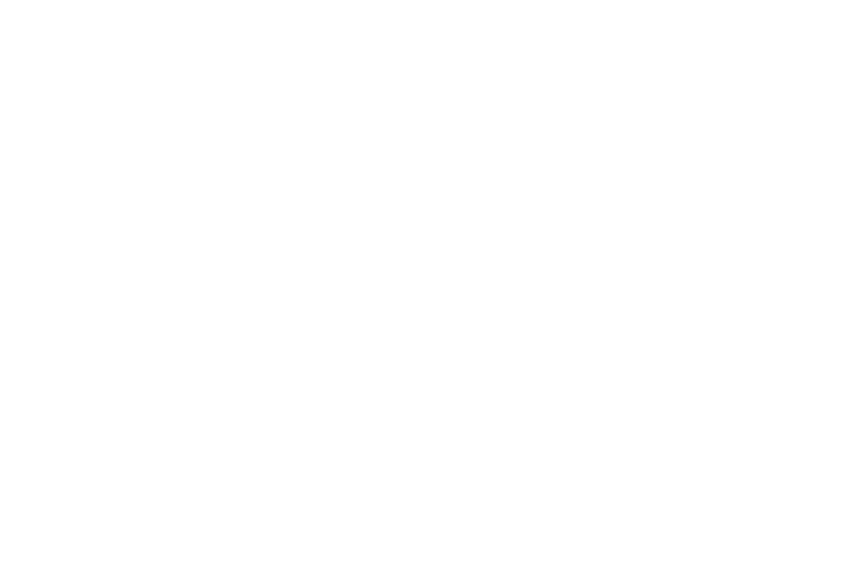

In [83]:
df_2['cardiovascular_disease'].plot.hist(color='orange')
plots.title("Cardiovascular Disease Rates in San Francisco Census Tracts");
plots.xlabel('Cardiovascular Disease Rate (Per 10,000)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


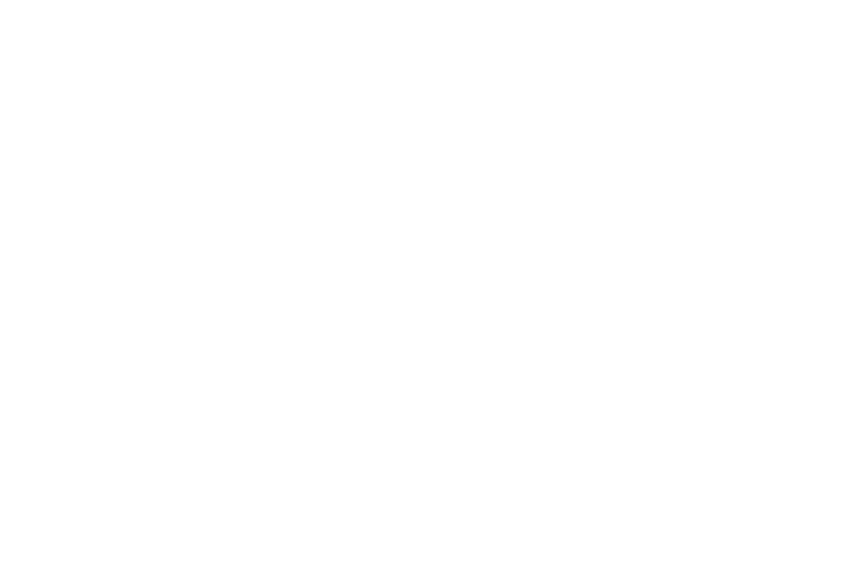

<IPython.core.display.Javascript object>


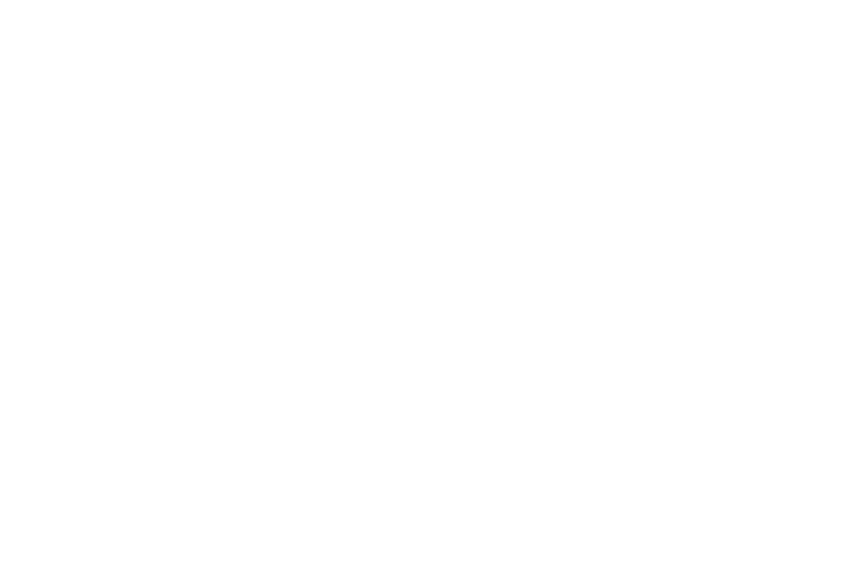

In [84]:
df_3['cardiovascular_disease'].plot.hist(color='purple')
plots.title("Cardiovascular Disease Rates in Oakland Census Tracts");
plots.xlabel('Cardiovascular Disease Rate (Per 10,000)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


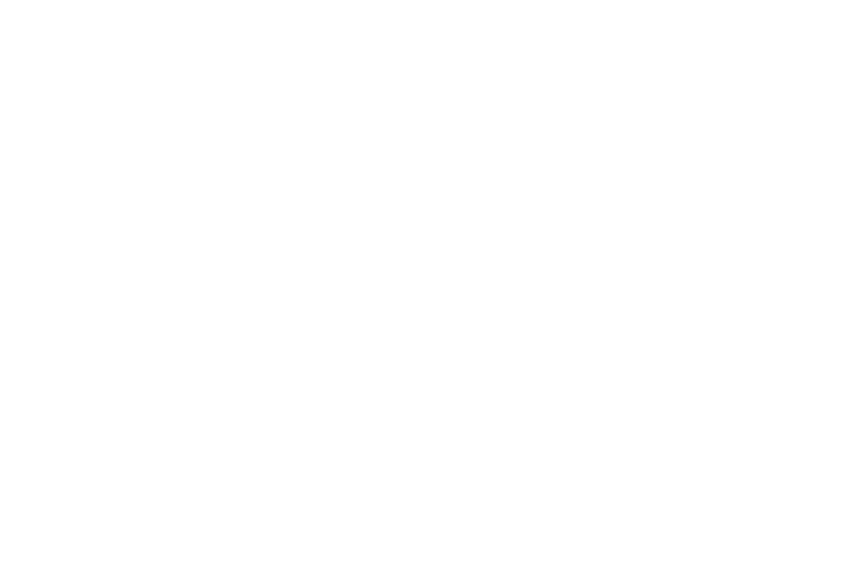

<IPython.core.display.Javascript object>


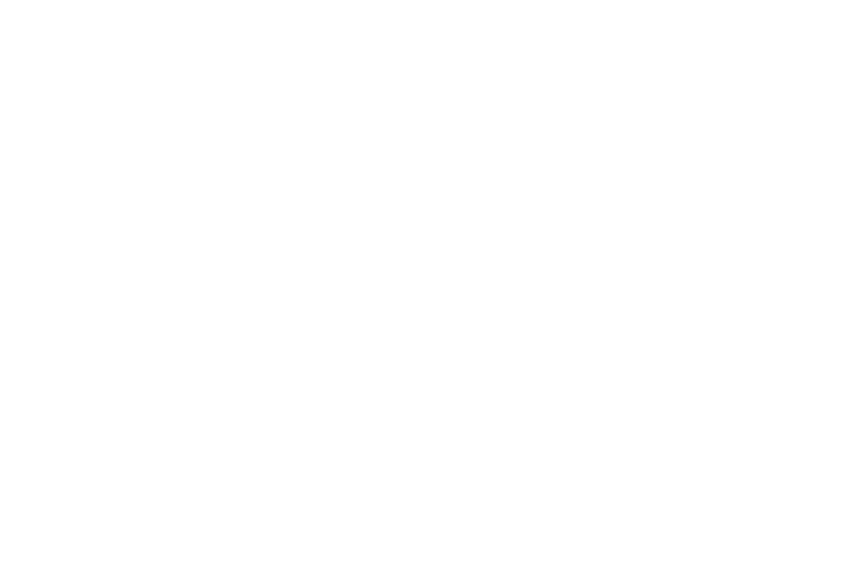

In [85]:
df['asthma'].plot.hist()
plots.title("Frequency of Asthma Rates in California");
plots.xlabel('Asthma Rate (Per 10,000)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


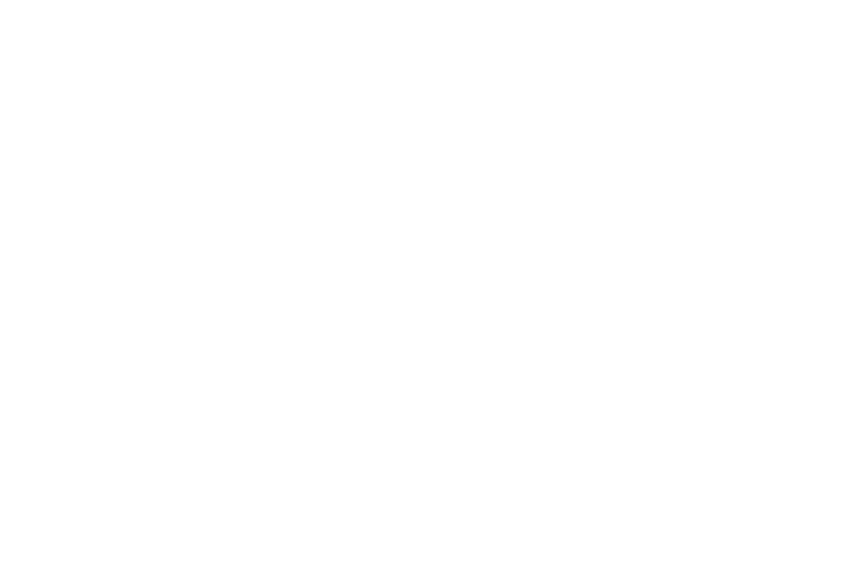

<IPython.core.display.Javascript object>


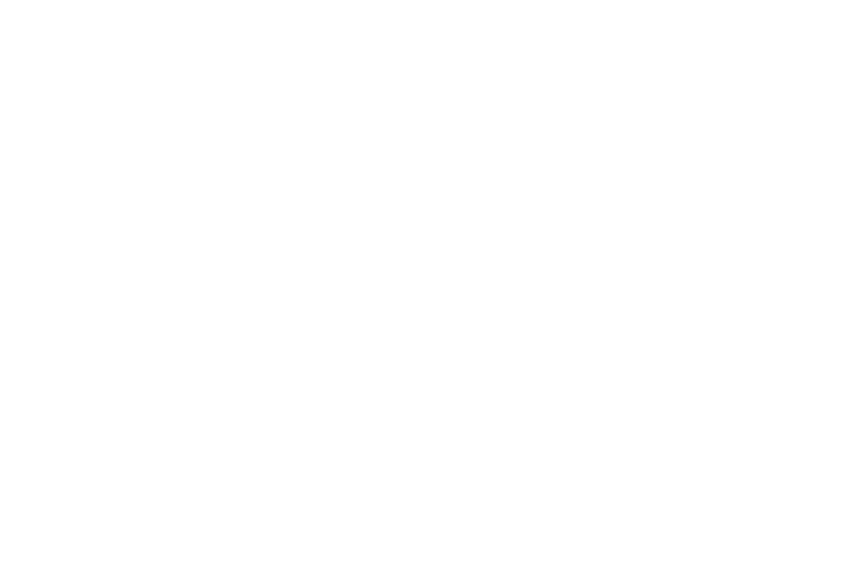

In [86]:
df_1['asthma'].plot.hist(color='green')
plots.title("Frequency of Asthma Rates in the Bay Area");
plots.xlabel('Asthma Rate (Per 10,000)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


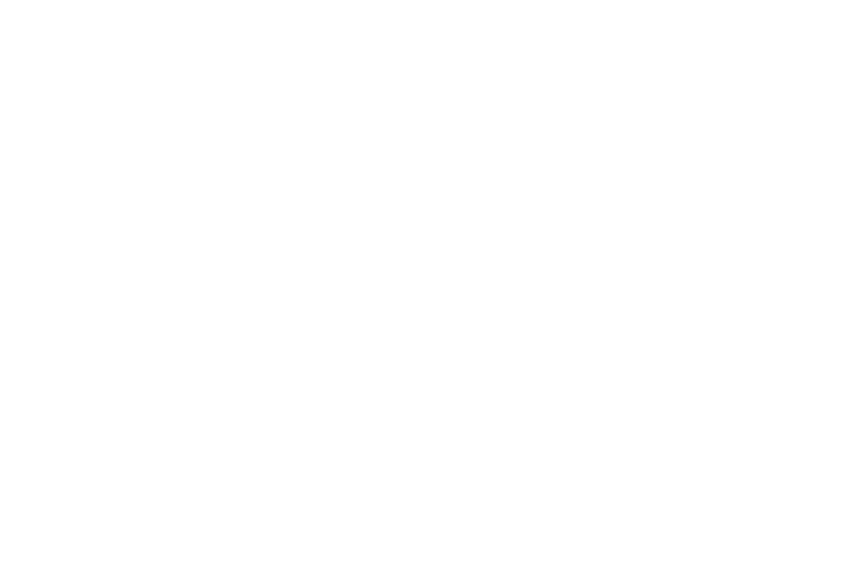

<IPython.core.display.Javascript object>


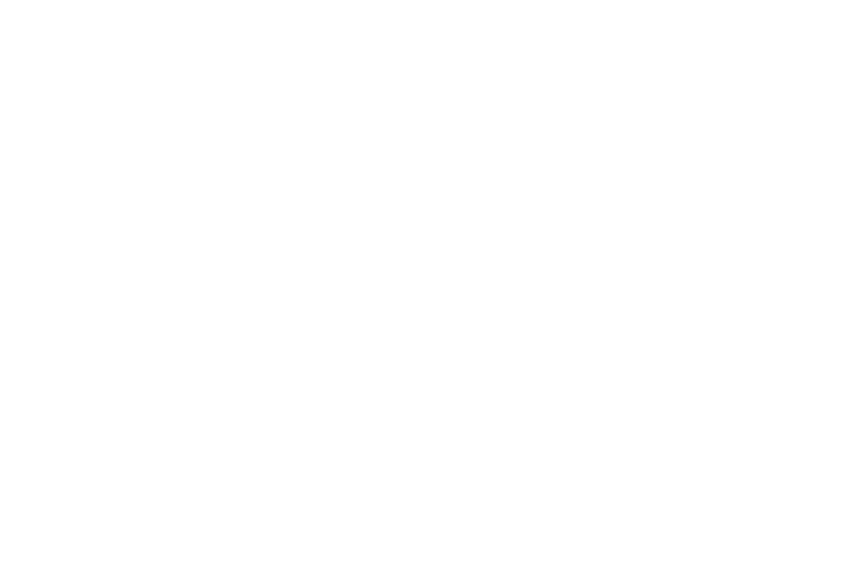

In [87]:
df_2['asthma'].plot.hist(color='orange')
plots.title("Frequency of Asthma Rates in San Francisco");
plots.xlabel('Asthma Rate (Per 10,000)')
plots.ylabel('# of Census Tracts')
plots.show()

<IPython.core.display.Javascript object>


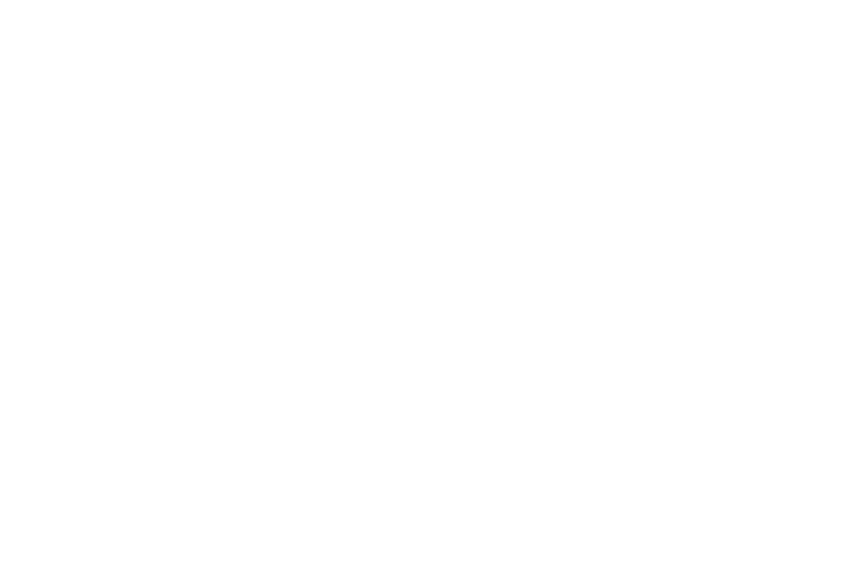

<IPython.core.display.Javascript object>


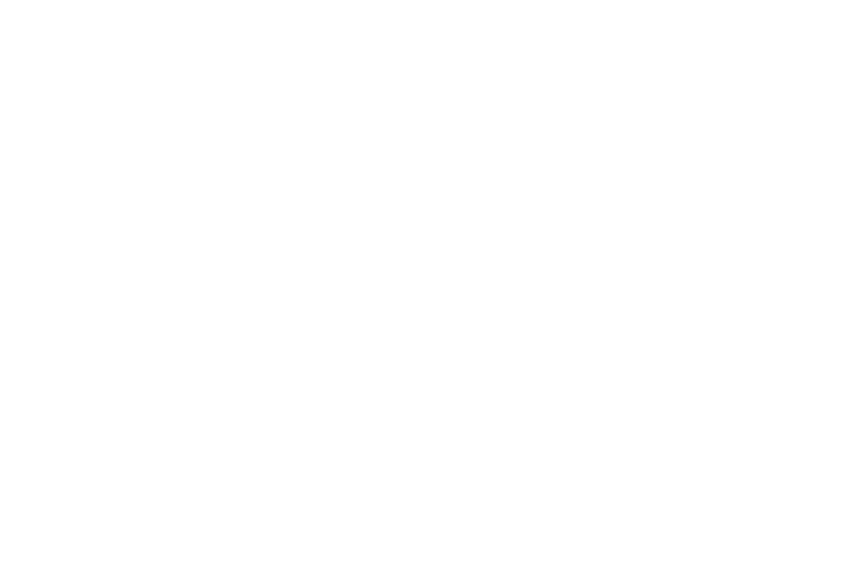

In [88]:
df_3['asthma'].plot.hist(color='purple')
plots.title("Frequency of Asthma Rates in Oakland");
plots.xlabel('Asthma Rate (Per 10,000)')
plots.ylabel('# of Census Tracts')
plots.show()